In [125]:
import os
import sys
import gi

gi.require_version('NumCosmo', '1.0')
gi.require_version('NumCosmoMath', '1.0')
from gi.repository import GObject
from gi.repository import NumCosmo as Nc
from gi.repository import NumCosmoMath as Ncm

os.environ['CLMM_MODELING_BACKEND'] = 'nc'

__name__ = "NcContext"

Ncm.cfg_init ()
Ncm.cfg_set_log_handler (lambda msg: sys.stdout.write (msg) and sys.stdout.flush ())

try: import clmm
except:
    import notebook_install
    notebook_install.install_clmm_pipeline(upgrade=False)
    import clmm
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import timedelta
from astropy import units
from numpy import random
plt.rcParams['text.latex.preamble'] = [r'\usepackage{pxfonts, mathpazo}']
plt.rcParams['font.family']=['Palatino']
plt.rc('text', usetex=True)


import clmm.dataops as da
import clmm.theory as theory
from clmm import Cosmology
from clmm.support import mock_data as mock
from clmm.utils import convert_units
from scipy.stats import chi2
from scipy.stats import kstest
from scipy.stats import shapiro
from scipy.stats import binned_statistic
import corner
import math

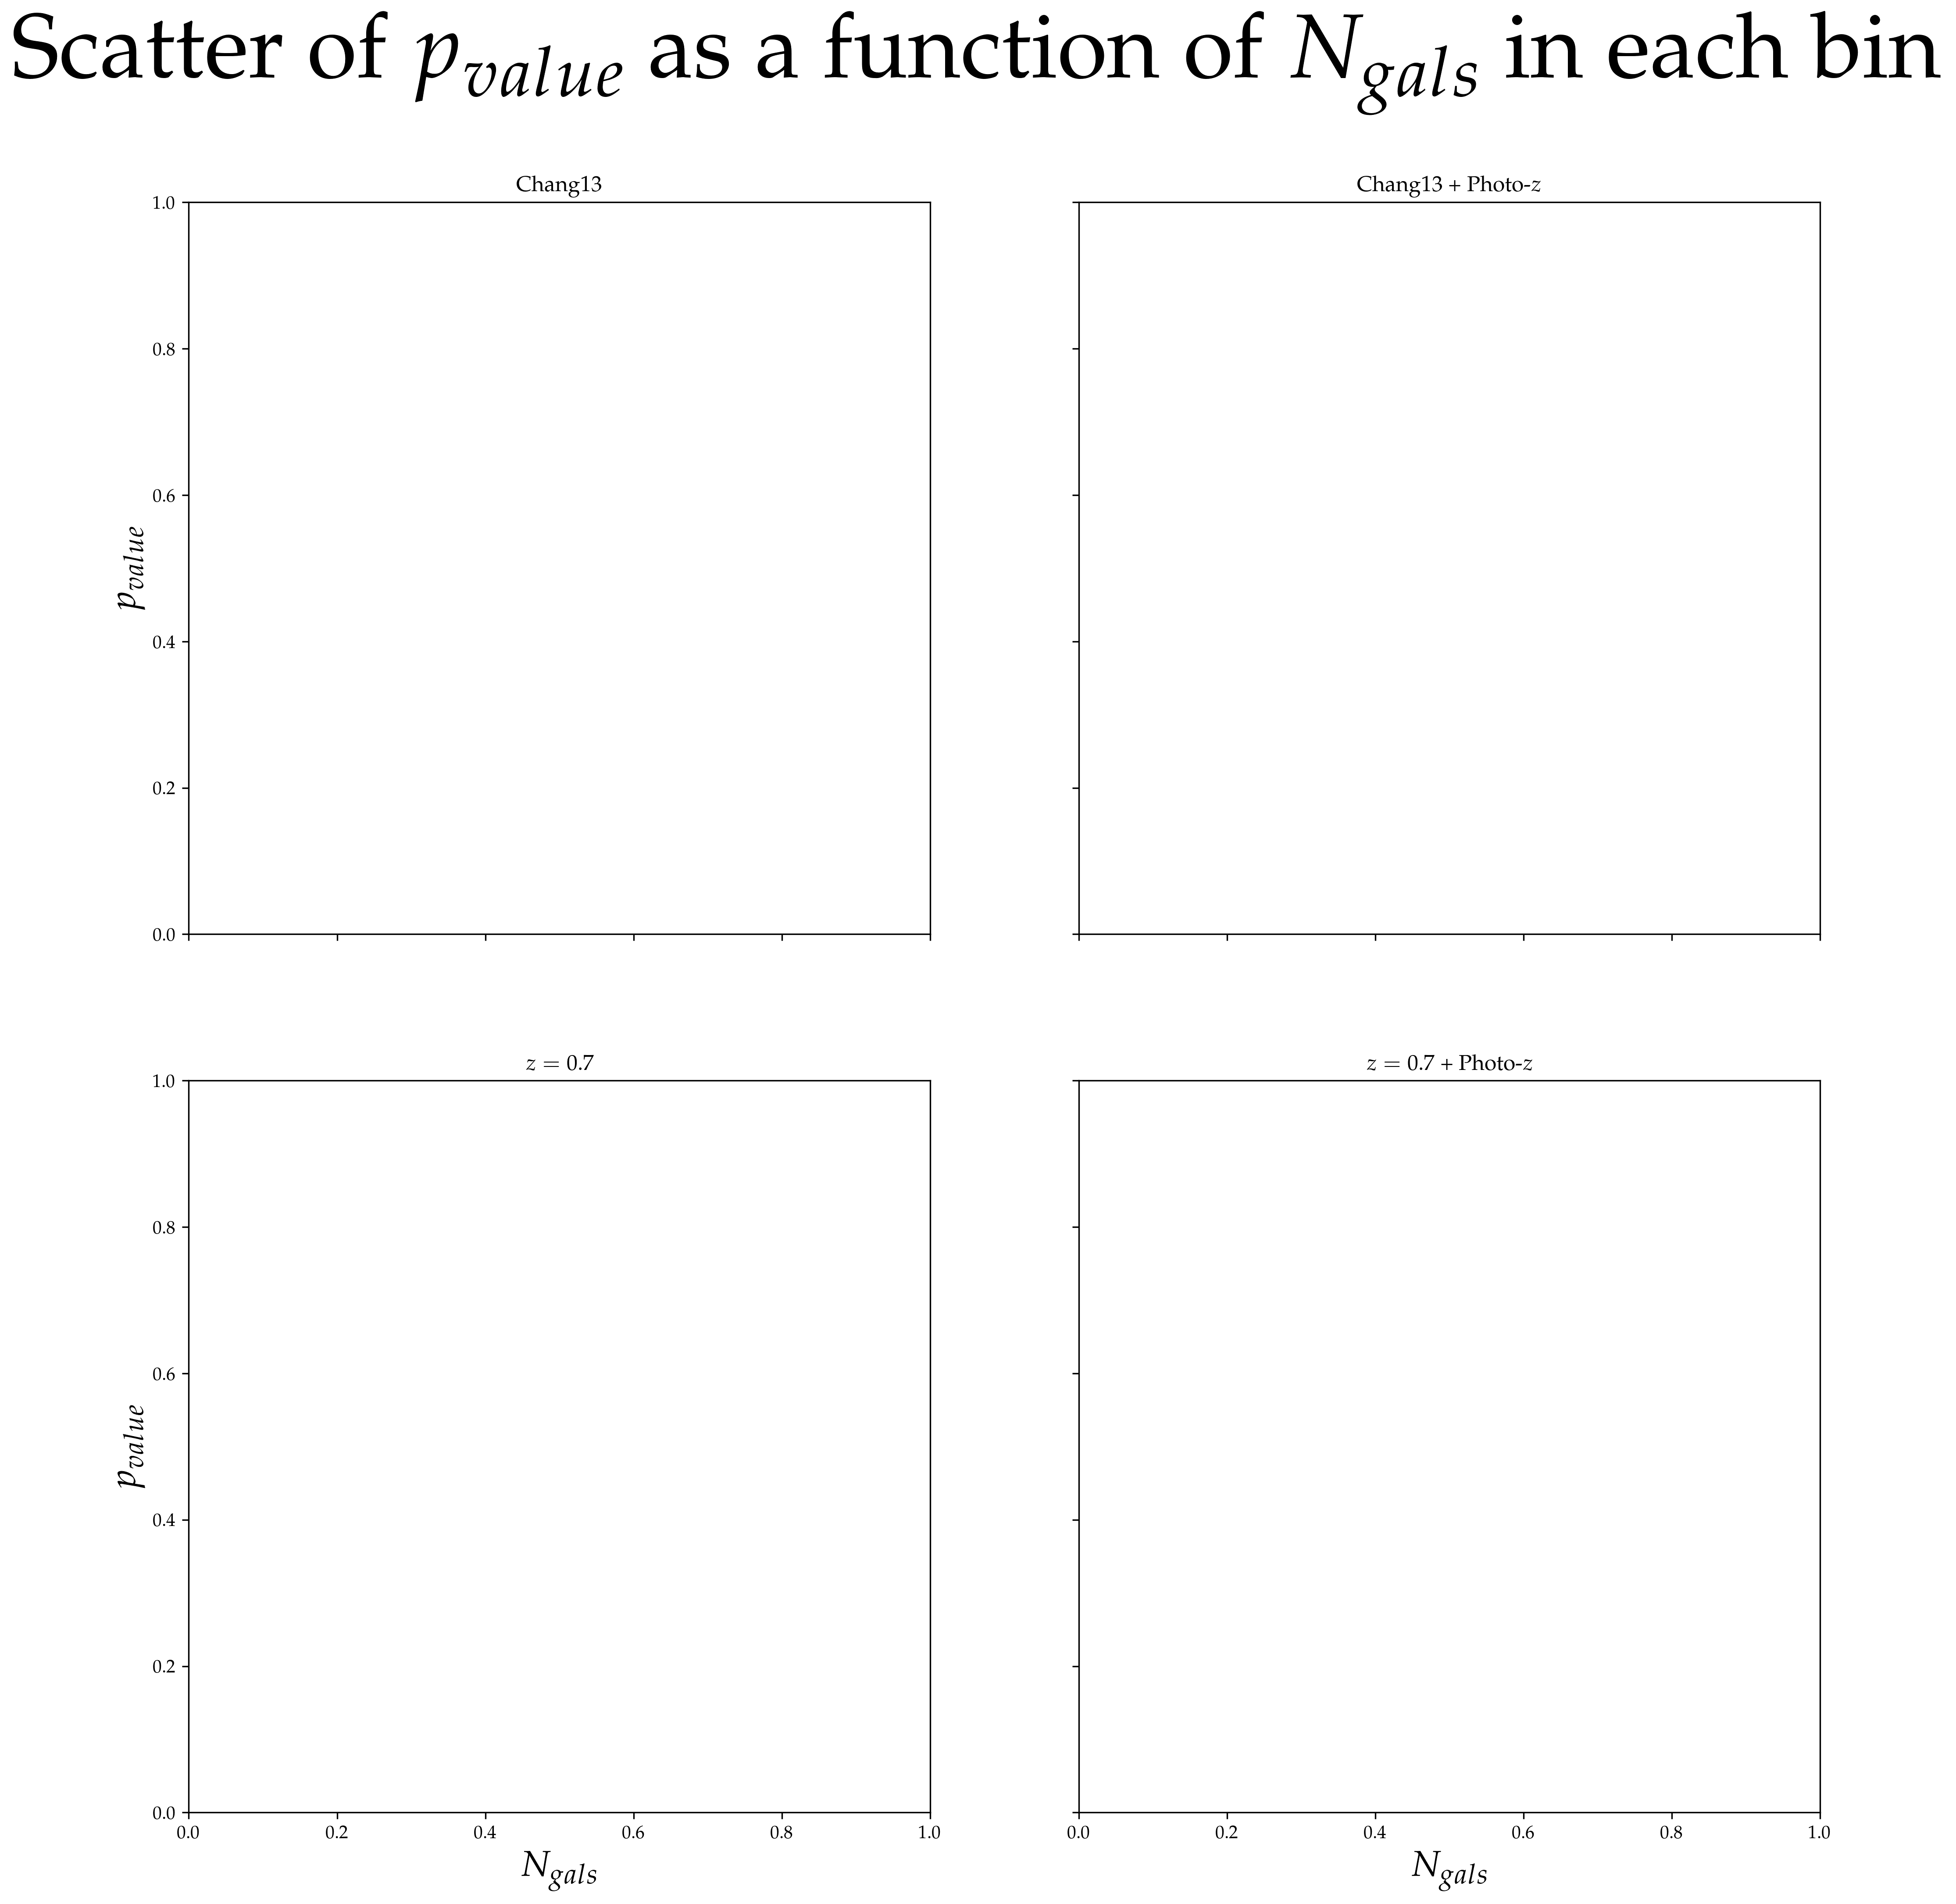

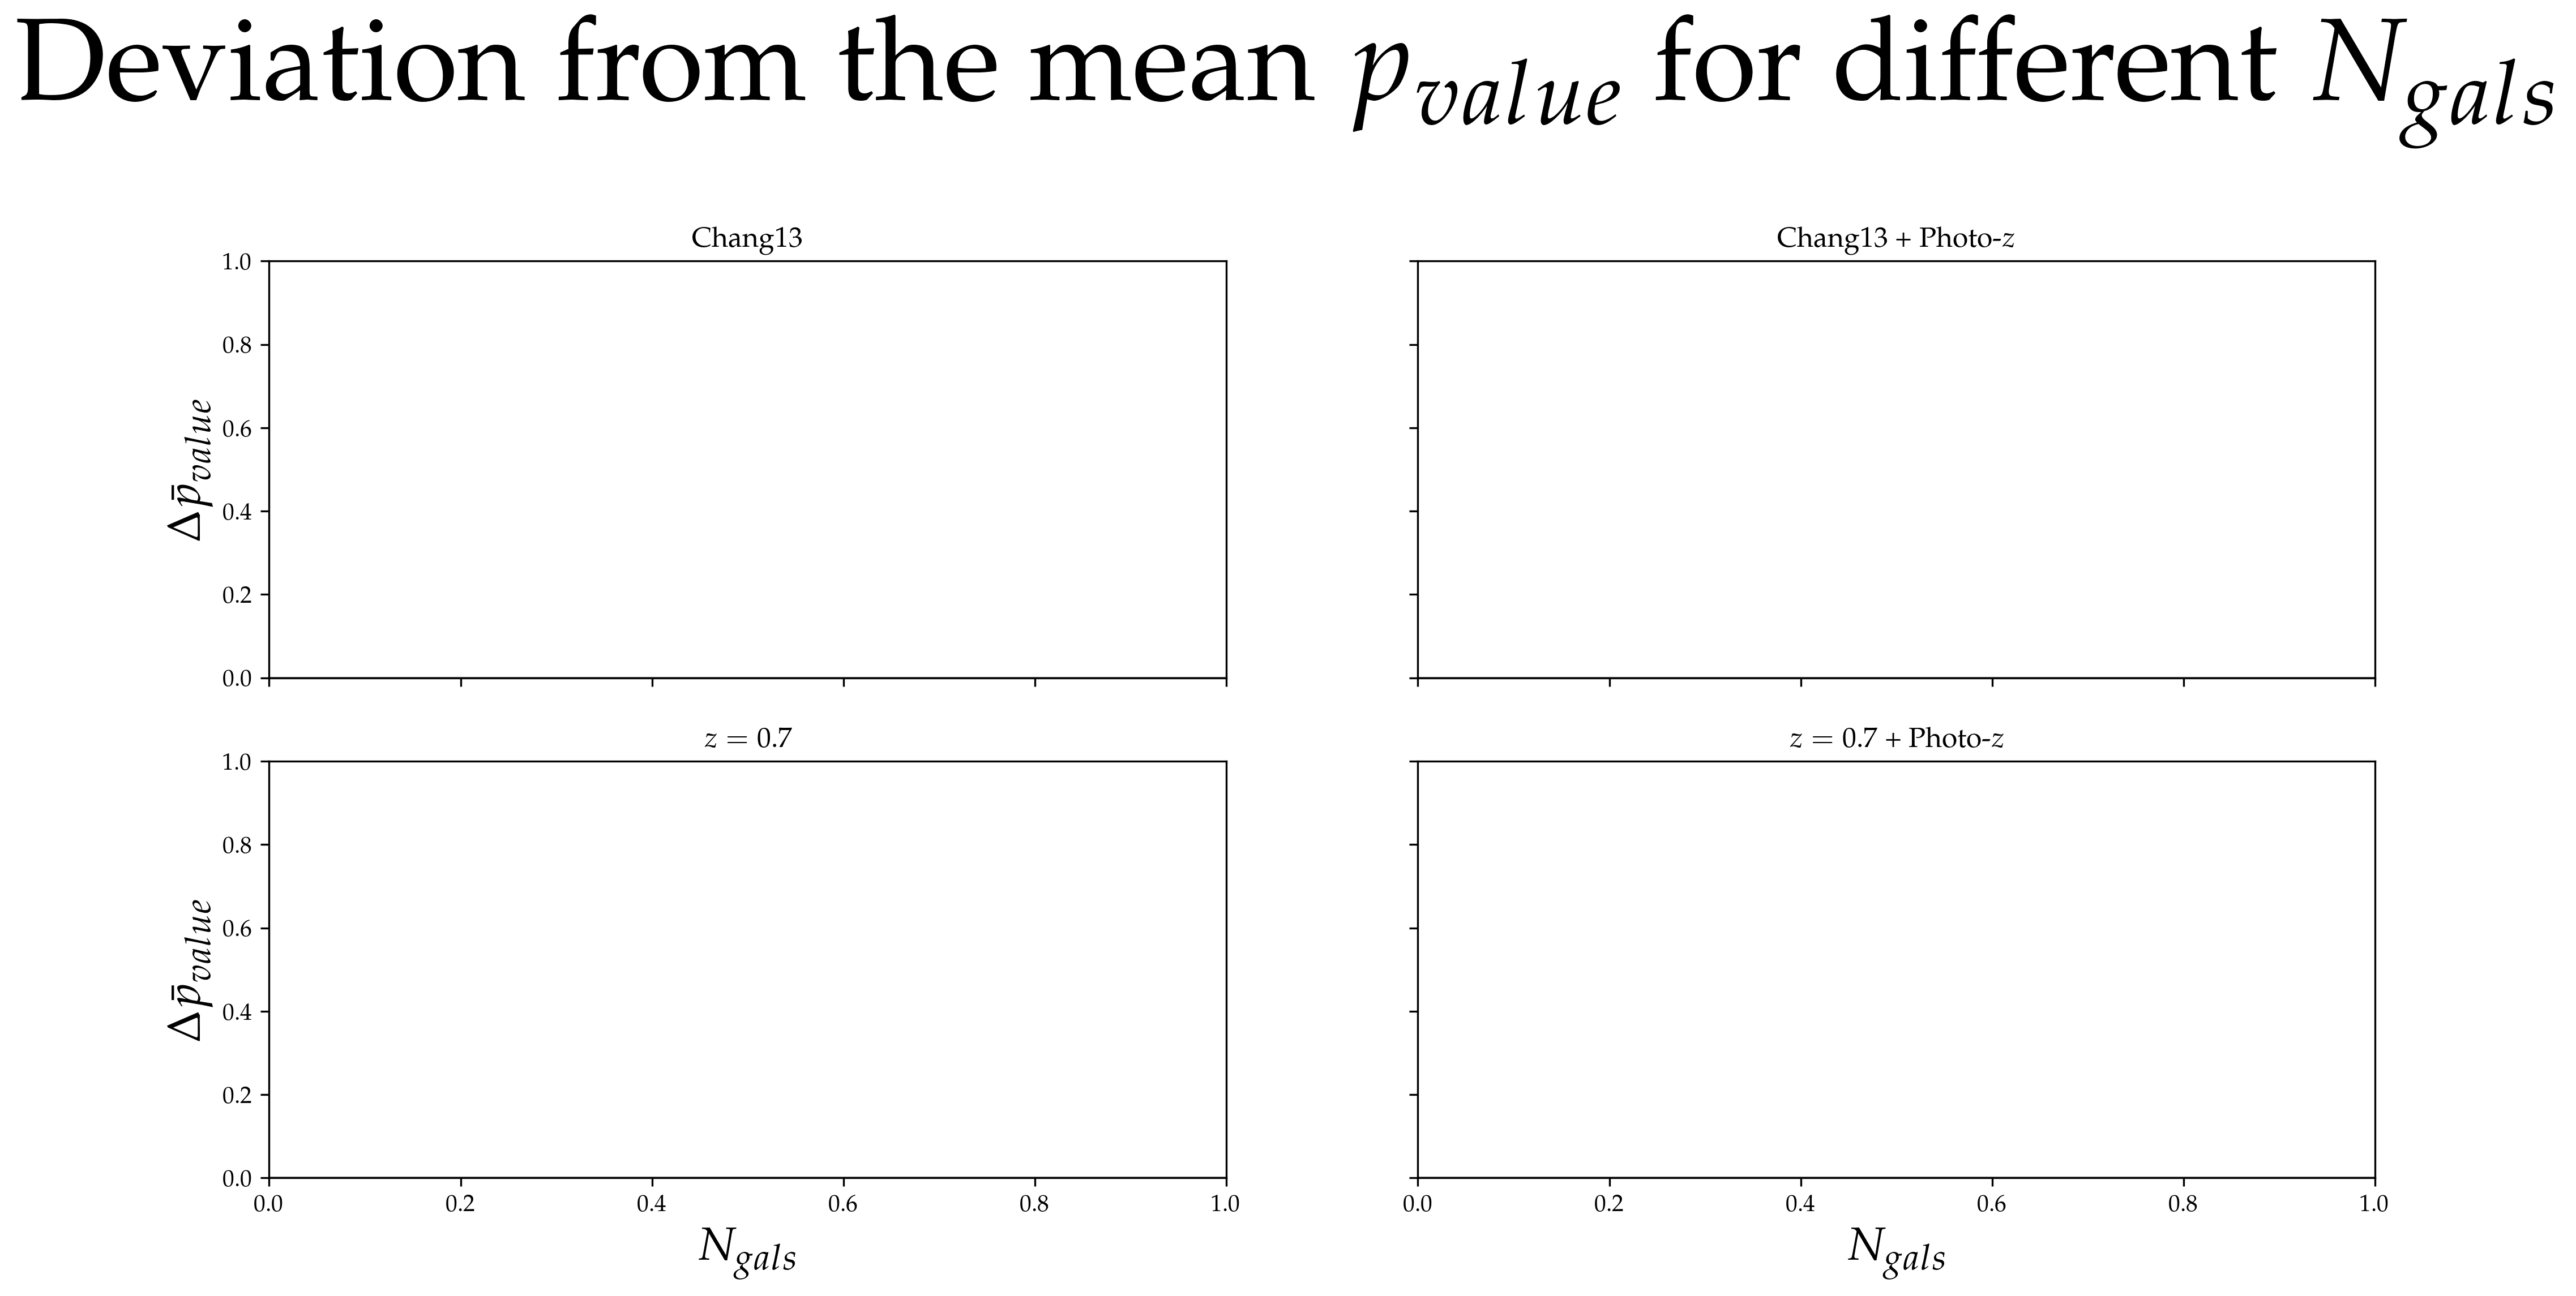

In [126]:
fig0, ax0 = plt.subplots(2, 2, figsize=(16,16), dpi=300, facecolor="white", sharey=True, sharex=True)
fig1, ax1 = plt.subplots(2, 2, figsize=(16,8), dpi=300, facecolor="white", sharey=True, sharex=True)

fig0.suptitle(f"Scatter of $p_{{value}}$ as a function of $N_{{gals}}$ in each bin", fontsize='50', weight='bold')
fig1.suptitle(f"Deviation from the mean $p_{{value}}$ for different $N_{{gals}}$", fontsize='50', weight='bold')

# fig0.tight_layout()
fig0.subplots_adjust(top=0.89)
# fig1.tight_layout()
fig1.subplots_adjust(top=0.8)

ax0[0][0].set_title(f"Chang13")
ax0[0][1].set_title(f"Chang13 + Photo-$z$")
ax0[1][0].set_title(f"$z = 0.7$")
ax0[1][1].set_title(f"$z = 0.7$ + Photo-$z$")
ax0[0][0].set_ylabel(f"$p_{{value}}$", fontsize=20)
ax0[1][0].set_ylabel(f"$p_{{value}}$", fontsize=20)
ax0[1][0].set_xlabel(f"$N_{{gals}}$", fontsize=20)
ax0[1][1].set_xlabel(f"$N_{{gals}}$", fontsize=20)

ax1[0][0].set_title(f"Chang13")
ax1[0][1].set_title(f"Chang13 + Photo-$z$")
ax1[1][0].set_title(f"$z = 0.7$")
ax1[1][1].set_title(f"$z = 0.7$ + Photo-$z$")
ax1[0][0].set_ylabel(f"$\Delta \\bar{{p}}_{{value}}$", fontsize=20)
ax1[1][0].set_ylabel(f"$\Delta \\bar{{p}}_{{value}}$", fontsize=20)
ax1[1][0].set_xlabel(f"$N_{{gals}}$", fontsize=20)
ax1[1][1].set_xlabel(f"$N_{{gals}}$", fontsize=20)

ax1[0][0].axhline(y=0, linewidth=1, alpha=0.8, color='tab:gray')
ax1[0][1].axhline(y=0, linewidth=1, alpha=0.8, color='tab:gray')
ax1[1][0].axhline(y=0, linewidth=1, alpha=0.8, color='tab:gray')
ax1[1][1].axhline(y=0, linewidth=1, alpha=0.8, color='tab:gray')




# Shapiro-Wilk Test for spectroscopic Chang13 redshift

In [127]:
shapiro_73  = np.load(f"Data/Shapiro/shapiro_data_(chang13,73,10).npy")
shapiro_83  = np.load(f"Data/Shapiro/shapiro_data_(chang13,83,10).npy")
shapiro_94  = np.load(f"Data/Shapiro/shapiro_data_(chang13,94,10).npy")
shapiro_110 = np.load(f"Data/Shapiro/shapiro_data_(chang13,110,10).npy")
shapiro_132 = np.load(f"Data/Shapiro/shapiro_data_(chang13,132,10).npy")
shapiro_165 = np.load(f"Data/Shapiro/shapiro_data_(chang13,165,10).npy")
shapiro_220 = np.load(f"Data/Shapiro/shapiro_data_(chang13,220,10).npy")

### Scatter distribution

In [128]:
bin_width = 1
nbins = int(max(shapiro_73[:,1])//bin_width)
N_bin_edges = da.make_bins(0, max(shapiro_73[:,1]), nbins)

# fig0, ax0 = plt.subplots(2, 2, figsize=(16,16), dpi=100, facecolor="white")

pv_mean_73  = binned_statistic(shapiro_73[:,1], shapiro_73[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_73   = binned_statistic(shapiro_73[:,1], shapiro_73[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_73   = binned_statistic(shapiro_73[:,1], shapiro_73[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_83  = binned_statistic(shapiro_83[:,1], shapiro_83[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_83   = binned_statistic(shapiro_83[:,1], shapiro_83[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_83   = binned_statistic(shapiro_83[:,1], shapiro_83[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_94  = binned_statistic(shapiro_94[:,1], shapiro_94[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_94   = binned_statistic(shapiro_94[:,1], shapiro_94[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_94   = binned_statistic(shapiro_94[:,1], shapiro_94[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_110 = binned_statistic(shapiro_110[:,1], shapiro_110[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_110  = binned_statistic(shapiro_110[:,1], shapiro_110[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_110  = binned_statistic(shapiro_110[:,1], shapiro_110[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_132 = binned_statistic(shapiro_132[:,1], shapiro_132[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_132  = binned_statistic(shapiro_132[:,1], shapiro_132[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_132  = binned_statistic(shapiro_132[:,1], shapiro_132[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_165 = binned_statistic(shapiro_165[:,1], shapiro_165[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_165  = binned_statistic(shapiro_165[:,1], shapiro_165[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_165  = binned_statistic(shapiro_165[:,1], shapiro_165[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_220 = binned_statistic(shapiro_220[:,1], shapiro_220[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_220  = binned_statistic(shapiro_220[:,1], shapiro_220[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_220  = binned_statistic(shapiro_220[:,1], shapiro_220[:,1], bins=N_bin_edges, statistic='mean')[0]


ax0[0][0].scatter(N_mean_73, pv_mean_73, alpha=0.6, color='tab:red')
ax0[0][0].scatter(N_mean_83, pv_mean_83, alpha=0.6, color='tab:red')
ax0[0][0].scatter(N_mean_94, pv_mean_94, alpha=0.6, color='tab:red')
ax0[0][0].scatter(N_mean_110, pv_mean_110, alpha=0.6, color='tab:red')
ax0[0][0].scatter(N_mean_132, pv_mean_132, alpha=0.6, color='tab:red')
ax0[0][0].scatter(N_mean_165, pv_mean_165, alpha=0.6, color='tab:red')
ax0[0][0].scatter(N_mean_220, pv_mean_220, alpha=0.6, color='tab:red')

ax0[0][0].set_yscale('log')

ax0[0][0].axhline(y=0.01, linewidth=1, alpha=0.8, color='tab:gray')



# ax[1].scatter(N_mean_73, np.divide(pv_std_73, 1), alpha=0.6)
# ax[1].scatter(N_mean_83, np.divide(pv_std_83, 1), alpha=0.6)
# ax[1].scatter(N_mean_94, np.divide(pv_std_94, 1), alpha=0.6)
# ax[1].scatter(N_mean_110, np.divide(pv_std_110, 1), alpha=0.6)
# ax[1].scatter(N_mean_132, np.divide(pv_std_132, 1), alpha=0.6)
# ax[1].scatter(N_mean_165, np.divide(pv_std_165, 1), alpha=0.6)
# ax[1].scatter(N_mean_220, np.divide(pv_std_220, 1), alpha=0.6)

# y = [0, max(shapiro_73[:,1])]
# x = [0.01, 0.01]

# # ax[1].plot(y, x, linewidth=1, alpha=0.8, color='tab:gray')
# ax[1].set_yscale('log')

In [129]:
bin_width = 1
nbins = int(max(shapiro_73[:,1])//bin_width)
N_bin_edges = da.make_bins(0, max(shapiro_73[:,1]), nbins)

# fig1, ax1 = plt.subplots(2, 2, figsize=(16,8), dpi=300, facecolor="white")

pv_mean_73  = binned_statistic(shapiro_73[:,1], shapiro_73[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_73   = binned_statistic(shapiro_73[:,1], shapiro_73[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_73   = binned_statistic(shapiro_73[:,1], shapiro_73[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_83  = binned_statistic(shapiro_83[:,1], shapiro_83[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_83   = binned_statistic(shapiro_83[:,1], shapiro_83[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_83   = binned_statistic(shapiro_83[:,1], shapiro_83[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_94  = binned_statistic(shapiro_94[:,1], shapiro_94[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_94   = binned_statistic(shapiro_94[:,1], shapiro_94[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_94   = binned_statistic(shapiro_94[:,1], shapiro_94[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_110 = binned_statistic(shapiro_110[:,1], shapiro_110[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_110  = binned_statistic(shapiro_110[:,1], shapiro_110[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_110  = binned_statistic(shapiro_110[:,1], shapiro_110[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_132 = binned_statistic(shapiro_132[:,1], shapiro_132[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_132  = binned_statistic(shapiro_132[:,1], shapiro_132[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_132  = binned_statistic(shapiro_132[:,1], shapiro_132[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_165 = binned_statistic(shapiro_165[:,1], shapiro_165[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_165  = binned_statistic(shapiro_165[:,1], shapiro_165[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_165  = binned_statistic(shapiro_165[:,1], shapiro_165[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_220 = binned_statistic(shapiro_220[:,1], shapiro_220[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_220  = binned_statistic(shapiro_220[:,1], shapiro_220[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_220  = binned_statistic(shapiro_220[:,1], shapiro_220[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean  = [np.nanmean([pv_mean_73[i], pv_mean_83[i], pv_mean_94[i], pv_mean_110[i], pv_mean_132[i], pv_mean_165[i], pv_mean_220[i]]) for i in range(nbins)]
std_mean = np.sqrt(np.nansum([np.power(pv_std_73,2), np.power(pv_std_83,2), np.power(pv_std_94,2), np.power(pv_std_110,2), np.power(pv_std_132,2), np.power(pv_std_165,2), np.power(pv_std_220,2)], axis=0))
    
# ax1[0][0].errorbar(N_mean_73, np.subtract(pv_mean_73, pv_mean), yerr=np.sqrt(np.sum([np.power(pv_std_73,2), np.power(std_mean, 2)], axis=0)), fmt='o', alpha=0.8)
# ax1[0][0].errorbar(N_mean_83, np.subtract(pv_mean_83, pv_mean), yerr=np.sqrt(np.sum([np.power(pv_std_83,2), np.power(std_mean, 2)], axis=0)), fmt='o', alpha=0.8)
# ax1[0][0].errorbar(N_mean_94, np.subtract(pv_mean_94, pv_mean), yerr=np.sqrt(np.sum([np.power(pv_std_94,2), np.power(std_mean, 2)], axis=0)), fmt='o', alpha=0.8)
# ax1[0][0].errorbar(N_mean_110, np.subtract(pv_mean_110, pv_mean), yerr=np.sqrt(np.sum([np.power(pv_std_110,2), np.power(std_mean, 2)], axis=0)), fmt='o', alpha=0.8)
# ax1[0][0].errorbar(N_mean_132, np.subtract(pv_mean_132, pv_mean), yerr=np.sqrt(np.sum([np.power(pv_std_132,2), np.power(std_mean, 2)], axis=0)), fmt='o', alpha=0.8)
# ax1[0][0].errorbar(N_mean_165, np.subtract(pv_mean_165, pv_mean), yerr=np.sqrt(np.sum([np.power(pv_std_165,2), np.power(std_mean, 2)], axis=0)), fmt='o', alpha=0.8)
# ax1[0][0].errorbar(N_mean_220, np.subtract(pv_mean_220, pv_mean), yerr=np.sqrt(np.sum([np.power(pv_std_220,2), np.power(std_mean, 2)], axis=0)), fmt='o', alpha=0.8)

ax1[0][0].scatter(N_mean_73, np.subtract(pv_mean_73, pv_mean), alpha=0.8, s=5)
ax1[0][0].scatter(N_mean_83, np.subtract(pv_mean_83, pv_mean), alpha=0.8, s=5)
ax1[0][0].scatter(N_mean_94, np.subtract(pv_mean_94, pv_mean), alpha=0.8, s=5)
ax1[0][0].scatter(N_mean_110, np.subtract(pv_mean_110, pv_mean), alpha=0.8, s=5)
ax1[0][0].scatter(N_mean_132, np.subtract(pv_mean_132, pv_mean), alpha=0.8, s=5)
ax1[0][0].scatter(N_mean_165, np.subtract(pv_mean_165, pv_mean), alpha=0.8, s=5)
ax1[0][0].scatter(N_mean_220, np.subtract(pv_mean_220, pv_mean), alpha=0.8, s=5)

ax1[0][0].set_xlim(0,80)

# ax.errorbar(N_mean_73, np.abs(np.subtract(pv_mean_73, pv_mean)), fmt='o', alpha=0.8)
# ax.errorbar(N_mean_83, np.abs(np.subtract(pv_mean_83, pv_mean)), fmt='o', alpha=0.8)
# ax.errorbar(N_mean_94, np.abs(np.subtract(pv_mean_94, pv_mean)), fmt='o', alpha=0.8)
# ax.errorbar(N_mean_110, np.abs(np.subtract(pv_mean_110, pv_mean)), fmt='o', alpha=0.8)
# ax.errorbar(N_mean_132, np.abs(np.subtract(pv_mean_132, pv_mean)), fmt='o', alpha=0.8)
# ax.errorbar(N_mean_165, np.abs(np.subtract(pv_mean_165, pv_mean)), fmt='o', alpha=0.8)
# ax.errorbar(N_mean_220, np.abs(np.subtract(pv_mean_220, pv_mean)), fmt='o', alpha=0.8)

# ax.set_yscale('log')

/tmp/ipykernel_52597/2995863750.py:35: RuntimeWarning: Mean of empty slice
  pv_mean  = [np.nanmean([pv_mean_73[i], pv_mean_83[i], pv_mean_94[i], pv_mean_110[i], pv_mean_132[i], pv_mean_165[i], pv_mean_220[i]]) for i in range(nbins)]


(0.0, 80.0)

# Shapiro-Wilk Test for photo-$z$ Chang13 redshift

In [130]:
shapiro_73  = np.load(f"Data/Shapiro/shapiro_data_(('chang13', 0.05),73,10).npy")
shapiro_83  = np.load(f"Data/Shapiro/shapiro_data_(('chang13', 0.05),83,10).npy")
shapiro_94  = np.load(f"Data/Shapiro/shapiro_data_(('chang13', 0.05),94,10).npy")
shapiro_110 = np.load(f"Data/Shapiro/shapiro_data_(('chang13', 0.05),110,10).npy")
shapiro_132 = np.load(f"Data/Shapiro/shapiro_data_(('chang13', 0.05),132,10).npy")
shapiro_165 = np.load(f"Data/Shapiro/shapiro_data_(('chang13', 0.05),165,10).npy")
shapiro_220 = np.load(f"Data/Shapiro/shapiro_data_(('chang13', 0.05),220,10).npy")

### Scatter distribution

In [131]:
bin_width = 1
nbins = int(max(shapiro_73[:,1])//bin_width)
N_bin_edges = da.make_bins(0, max(shapiro_73[:,1]), nbins)

# fig, ax = plt.subplots(1, 2, figsize=(32,16), dpi=100, facecolor="white")

pv_mean_73  = binned_statistic(shapiro_73[:,1], shapiro_73[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_73   = binned_statistic(shapiro_73[:,1], shapiro_73[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_73   = binned_statistic(shapiro_73[:,1], shapiro_73[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_83  = binned_statistic(shapiro_83[:,1], shapiro_83[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_83   = binned_statistic(shapiro_83[:,1], shapiro_83[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_83   = binned_statistic(shapiro_83[:,1], shapiro_83[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_94  = binned_statistic(shapiro_94[:,1], shapiro_94[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_94   = binned_statistic(shapiro_94[:,1], shapiro_94[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_94   = binned_statistic(shapiro_94[:,1], shapiro_94[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_110 = binned_statistic(shapiro_110[:,1], shapiro_110[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_110  = binned_statistic(shapiro_110[:,1], shapiro_110[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_110  = binned_statistic(shapiro_110[:,1], shapiro_110[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_132 = binned_statistic(shapiro_132[:,1], shapiro_132[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_132  = binned_statistic(shapiro_132[:,1], shapiro_132[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_132  = binned_statistic(shapiro_132[:,1], shapiro_132[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_165 = binned_statistic(shapiro_165[:,1], shapiro_165[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_165  = binned_statistic(shapiro_165[:,1], shapiro_165[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_165  = binned_statistic(shapiro_165[:,1], shapiro_165[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_220 = binned_statistic(shapiro_220[:,1], shapiro_220[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_220  = binned_statistic(shapiro_220[:,1], shapiro_220[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_220  = binned_statistic(shapiro_220[:,1], shapiro_220[:,1], bins=N_bin_edges, statistic='mean')[0]


ax0[0][1].scatter(N_mean_73, pv_mean_73, alpha=0.6, color='tab:red')
ax0[0][1].scatter(N_mean_83, pv_mean_83, alpha=0.6, color='tab:red')
ax0[0][1].scatter(N_mean_94, pv_mean_94, alpha=0.6, color='tab:red')
ax0[0][1].scatter(N_mean_110, pv_mean_110, alpha=0.6, color='tab:red')
ax0[0][1].scatter(N_mean_132, pv_mean_132, alpha=0.6, color='tab:red')
ax0[0][1].scatter(N_mean_165, pv_mean_165, alpha=0.6, color='tab:red')
ax0[0][1].scatter(N_mean_220, pv_mean_220, alpha=0.6, color='tab:red')

ax0[0][1].set_yscale('log')

ax0[0][1].axhline(y=0.01, linewidth=1, alpha=0.8, color='tab:gray')


# ax[1].scatter(N_mean_73, np.divide(pv_std_73, 1), alpha=0.6)
# ax[1].scatter(N_mean_83, np.divide(pv_std_83, 1), alpha=0.6)
# ax[1].scatter(N_mean_94, np.divide(pv_std_94, 1), alpha=0.6)
# ax[1].scatter(N_mean_110, np.divide(pv_std_110, 1), alpha=0.6)
# ax[1].scatter(N_mean_132, np.divide(pv_std_132, 1), alpha=0.6)
# ax[1].scatter(N_mean_165, np.divide(pv_std_165, 1), alpha=0.6)
# ax[1].scatter(N_mean_220, np.divide(pv_std_220, 1), alpha=0.6)

# y = [0, max(shapiro_73[:,1])]
# x = [0.01, 0.01]

# # ax[1].plot(y, x, linewidth=1, alpha=0.8, color='tab:gray')
# ax[1].set_yscale('log')

In [132]:
bin_width = 1
nbins = int(max(shapiro_73[:,1])//bin_width)
N_bin_edges = da.make_bins(0, max(shapiro_73[:,1]), nbins)

# fig, ax = plt.subplots(1, 1, figsize=(16,8), dpi=300, facecolor="white")

pv_mean_73  = binned_statistic(shapiro_73[:,1], shapiro_73[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_73   = binned_statistic(shapiro_73[:,1], shapiro_73[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_73   = binned_statistic(shapiro_73[:,1], shapiro_73[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_83  = binned_statistic(shapiro_83[:,1], shapiro_83[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_83   = binned_statistic(shapiro_83[:,1], shapiro_83[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_83   = binned_statistic(shapiro_83[:,1], shapiro_83[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_94  = binned_statistic(shapiro_94[:,1], shapiro_94[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_94   = binned_statistic(shapiro_94[:,1], shapiro_94[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_94   = binned_statistic(shapiro_94[:,1], shapiro_94[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_110 = binned_statistic(shapiro_110[:,1], shapiro_110[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_110  = binned_statistic(shapiro_110[:,1], shapiro_110[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_110  = binned_statistic(shapiro_110[:,1], shapiro_110[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_132 = binned_statistic(shapiro_132[:,1], shapiro_132[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_132  = binned_statistic(shapiro_132[:,1], shapiro_132[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_132  = binned_statistic(shapiro_132[:,1], shapiro_132[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_165 = binned_statistic(shapiro_165[:,1], shapiro_165[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_165  = binned_statistic(shapiro_165[:,1], shapiro_165[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_165  = binned_statistic(shapiro_165[:,1], shapiro_165[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_220 = binned_statistic(shapiro_220[:,1], shapiro_220[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_220  = binned_statistic(shapiro_220[:,1], shapiro_220[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_220  = binned_statistic(shapiro_220[:,1], shapiro_220[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean  = [np.nanmean([pv_mean_73[i], pv_mean_83[i], pv_mean_94[i], pv_mean_110[i], pv_mean_132[i], pv_mean_165[i], pv_mean_220[i]]) for i in range(nbins)]
std_mean = np.sqrt(np.nansum([np.power(pv_std_73,2), np.power(pv_std_83,2), np.power(pv_std_94,2), np.power(pv_std_110,2), np.power(pv_std_132,2), np.power(pv_std_165,2), np.power(pv_std_220,2)], axis=0))
    
# ax1[0][1].errorbar(N_mean_73, np.subtract(pv_mean_73, pv_mean), yerr=np.sqrt(np.sum([np.power(pv_std_73,2), np.power(std_mean, 2)], axis=0)), fmt='o', alpha=0.8)
# ax1[0][1].errorbar(N_mean_83, np.subtract(pv_mean_83, pv_mean), yerr=np.sqrt(np.sum([np.power(pv_std_83,2), np.power(std_mean, 2)], axis=0)), fmt='o', alpha=0.8)
# ax1[0][1].errorbar(N_mean_94, np.subtract(pv_mean_94, pv_mean), yerr=np.sqrt(np.sum([np.power(pv_std_94,2), np.power(std_mean, 2)], axis=0)), fmt='o', alpha=0.8)
# ax1[0][1].errorbar(N_mean_110, np.subtract(pv_mean_110, pv_mean), yerr=np.sqrt(np.sum([np.power(pv_std_110,2), np.power(std_mean, 2)], axis=0)), fmt='o', alpha=0.8)
# ax1[0][1].errorbar(N_mean_132, np.subtract(pv_mean_132, pv_mean), yerr=np.sqrt(np.sum([np.power(pv_std_132,2), np.power(std_mean, 2)], axis=0)), fmt='o', alpha=0.8)
# ax1[0][1].errorbar(N_mean_165, np.subtract(pv_mean_165, pv_mean), yerr=np.sqrt(np.sum([np.power(pv_std_165,2), np.power(std_mean, 2)], axis=0)), fmt='o', alpha=0.8)
# ax1[0][1].errorbar(N_mean_220, np.subtract(pv_mean_220, pv_mean), yerr=np.sqrt(np.sum([np.power(pv_std_220,2), np.power(std_mean, 2)], axis=0)), fmt='o', alpha=0.8)

ax1[0][1].scatter(N_mean_73, np.subtract(pv_mean_73, pv_mean), alpha=0.8, s=5)
ax1[0][1].scatter(N_mean_83, np.subtract(pv_mean_83, pv_mean), alpha=0.8, s=5)
ax1[0][1].scatter(N_mean_94, np.subtract(pv_mean_94, pv_mean), alpha=0.8, s=5)
ax1[0][1].scatter(N_mean_110, np.subtract(pv_mean_110, pv_mean), alpha=0.8, s=5)
ax1[0][1].scatter(N_mean_132, np.subtract(pv_mean_132, pv_mean), alpha=0.8, s=5)
ax1[0][1].scatter(N_mean_165, np.subtract(pv_mean_165, pv_mean), alpha=0.8, s=5)
ax1[0][1].scatter(N_mean_220, np.subtract(pv_mean_220, pv_mean), alpha=0.8, s=5)

ax1[0][1].set_xlim(0,80)




# ax.errorbar(N_mean_73, np.abs(np.subtract(pv_mean_73, pv_mean)), fmt='o', alpha=0.8)
# ax.errorbar(N_mean_83, np.abs(np.subtract(pv_mean_83, pv_mean)), fmt='o', alpha=0.8)
# ax.errorbar(N_mean_94, np.abs(np.subtract(pv_mean_94, pv_mean)), fmt='o', alpha=0.8)
# ax.errorbar(N_mean_110, np.abs(np.subtract(pv_mean_110, pv_mean)), fmt='o', alpha=0.8)
# ax.errorbar(N_mean_132, np.abs(np.subtract(pv_mean_132, pv_mean)), fmt='o', alpha=0.8)
# ax.errorbar(N_mean_165, np.abs(np.subtract(pv_mean_165, pv_mean)), fmt='o', alpha=0.8)
# ax.errorbar(N_mean_220, np.abs(np.subtract(pv_mean_220, pv_mean)), fmt='o', alpha=0.8)

# ax.set_yscale('log')

/tmp/ipykernel_52597/2679477106.py:35: RuntimeWarning: Mean of empty slice
  pv_mean  = [np.nanmean([pv_mean_73[i], pv_mean_83[i], pv_mean_94[i], pv_mean_110[i], pv_mean_132[i], pv_mean_165[i], pv_mean_220[i]]) for i in range(nbins)]


(0.0, 80.0)

# Shapiro-Wilk Test for fixed $z = 0.7$ redshift

In [133]:
shapiro_73  = np.load(f"Data/Shapiro/shapiro_data_(0.7,73,10).npy")
shapiro_83  = np.load(f"Data/Shapiro/shapiro_data_(0.7,83,10).npy")
shapiro_94  = np.load(f"Data/Shapiro/shapiro_data_(0.7,94,10).npy")
shapiro_110 = np.load(f"Data/Shapiro/shapiro_data_(0.7,110,10).npy")
shapiro_132 = np.load(f"Data/Shapiro/shapiro_data_(0.7,132,10).npy")
shapiro_165 = np.load(f"Data/Shapiro/shapiro_data_(0.7,165,10).npy")
shapiro_220 = np.load(f"Data/Shapiro/shapiro_data_(0.7,220,10).npy")

### Scatter distribution

In [134]:
bin_width = 1
nbins = int(max(shapiro_73[:,1])//bin_width)
N_bin_edges = da.make_bins(0, max(shapiro_73[:,1]), nbins)

# fig, ax = plt.subplots(1, 2, figsize=(32,16), dpi=100, facecolor="white")

pv_mean_73  = binned_statistic(shapiro_73[:,1], shapiro_73[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_73   = binned_statistic(shapiro_73[:,1], shapiro_73[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_73   = binned_statistic(shapiro_73[:,1], shapiro_73[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_83  = binned_statistic(shapiro_83[:,1], shapiro_83[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_83   = binned_statistic(shapiro_83[:,1], shapiro_83[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_83   = binned_statistic(shapiro_83[:,1], shapiro_83[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_94  = binned_statistic(shapiro_94[:,1], shapiro_94[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_94   = binned_statistic(shapiro_94[:,1], shapiro_94[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_94   = binned_statistic(shapiro_94[:,1], shapiro_94[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_110 = binned_statistic(shapiro_110[:,1], shapiro_110[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_110  = binned_statistic(shapiro_110[:,1], shapiro_110[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_110  = binned_statistic(shapiro_110[:,1], shapiro_110[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_132 = binned_statistic(shapiro_132[:,1], shapiro_132[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_132  = binned_statistic(shapiro_132[:,1], shapiro_132[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_132  = binned_statistic(shapiro_132[:,1], shapiro_132[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_165 = binned_statistic(shapiro_165[:,1], shapiro_165[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_165  = binned_statistic(shapiro_165[:,1], shapiro_165[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_165  = binned_statistic(shapiro_165[:,1], shapiro_165[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_220 = binned_statistic(shapiro_220[:,1], shapiro_220[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_220  = binned_statistic(shapiro_220[:,1], shapiro_220[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_220  = binned_statistic(shapiro_220[:,1], shapiro_220[:,1], bins=N_bin_edges, statistic='mean')[0]


ax0[1][0].scatter(N_mean_73, pv_mean_73, alpha=0.6, color='tab:red')
ax0[1][0].scatter(N_mean_83, pv_mean_83, alpha=0.6, color='tab:red')
ax0[1][0].scatter(N_mean_94, pv_mean_94, alpha=0.6, color='tab:red')
ax0[1][0].scatter(N_mean_110, pv_mean_110, alpha=0.6, color='tab:red')
ax0[1][0].scatter(N_mean_132, pv_mean_132, alpha=0.6, color='tab:red')
ax0[1][0].scatter(N_mean_165, pv_mean_165, alpha=0.6, color='tab:red')
ax0[1][0].scatter(N_mean_220, pv_mean_220, alpha=0.6, color='tab:red')

ax0[1][0].set_yscale('log')

ax0[1][0].axhline(y=0.01, linewidth=1, alpha=0.8, color='tab:gray')



# ax[1].scatter(N_mean_73, np.divide(pv_std_73, 1), alpha=0.6)
# ax[1].scatter(N_mean_83, np.divide(pv_std_83, 1), alpha=0.6)
# ax[1].scatter(N_mean_94, np.divide(pv_std_94, 1), alpha=0.6)
# ax[1].scatter(N_mean_110, np.divide(pv_std_110, 1), alpha=0.6)
# ax[1].scatter(N_mean_132, np.divide(pv_std_132, 1), alpha=0.6)
# ax[1].scatter(N_mean_165, np.divide(pv_std_165, 1), alpha=0.6)
# ax[1].scatter(N_mean_220, np.divide(pv_std_220, 1), alpha=0.6)

# y = [0, max(shapiro_73[:,1])]
# x = [0.01, 0.01]

# # ax[1].plot(y, x, linewidth=1, alpha=0.8, color='tab:gray')
# ax[1].set_yscale('log')

In [135]:
bin_width = 1
nbins = int(max(shapiro_73[:,1])//bin_width)
N_bin_edges = da.make_bins(0, max(shapiro_73[:,1]), nbins)

# fig, ax = plt.subplots(1, 1, figsize=(16,8), dpi=300, facecolor="white")

pv_mean_73  = binned_statistic(shapiro_73[:,1], shapiro_73[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_73   = binned_statistic(shapiro_73[:,1], shapiro_73[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_73   = binned_statistic(shapiro_73[:,1], shapiro_73[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_83  = binned_statistic(shapiro_83[:,1], shapiro_83[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_83   = binned_statistic(shapiro_83[:,1], shapiro_83[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_83   = binned_statistic(shapiro_83[:,1], shapiro_83[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_94  = binned_statistic(shapiro_94[:,1], shapiro_94[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_94   = binned_statistic(shapiro_94[:,1], shapiro_94[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_94   = binned_statistic(shapiro_94[:,1], shapiro_94[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_110 = binned_statistic(shapiro_110[:,1], shapiro_110[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_110  = binned_statistic(shapiro_110[:,1], shapiro_110[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_110  = binned_statistic(shapiro_110[:,1], shapiro_110[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_132 = binned_statistic(shapiro_132[:,1], shapiro_132[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_132  = binned_statistic(shapiro_132[:,1], shapiro_132[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_132  = binned_statistic(shapiro_132[:,1], shapiro_132[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_165 = binned_statistic(shapiro_165[:,1], shapiro_165[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_165  = binned_statistic(shapiro_165[:,1], shapiro_165[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_165  = binned_statistic(shapiro_165[:,1], shapiro_165[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_220 = binned_statistic(shapiro_220[:,1], shapiro_220[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_220  = binned_statistic(shapiro_220[:,1], shapiro_220[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_220  = binned_statistic(shapiro_220[:,1], shapiro_220[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean  = [np.nanmean([pv_mean_73[i], pv_mean_83[i], pv_mean_94[i], pv_mean_110[i], pv_mean_132[i], pv_mean_165[i], pv_mean_220[i]]) for i in range(nbins)]
std_mean = np.sqrt(np.nansum([np.power(pv_std_73,2), np.power(pv_std_83,2), np.power(pv_std_94,2), np.power(pv_std_110,2), np.power(pv_std_132,2), np.power(pv_std_165,2), np.power(pv_std_220,2)], axis=0))
    
# ax1[1][0].errorbar(N_mean_73, np.subtract(pv_mean_73, pv_mean), yerr=np.sqrt(np.sum([np.power(pv_std_73,2), np.power(std_mean, 2)], axis=0)), fmt='o', alpha=0.8)
# ax1[1][0].errorbar(N_mean_83, np.subtract(pv_mean_83, pv_mean), yerr=np.sqrt(np.sum([np.power(pv_std_83,2), np.power(std_mean, 2)], axis=0)), fmt='o', alpha=0.8)
# ax1[1][0].errorbar(N_mean_94, np.subtract(pv_mean_94, pv_mean), yerr=np.sqrt(np.sum([np.power(pv_std_94,2), np.power(std_mean, 2)], axis=0)), fmt='o', alpha=0.8)
# ax1[1][0].errorbar(N_mean_110, np.subtract(pv_mean_110, pv_mean), yerr=np.sqrt(np.sum([np.power(pv_std_110,2), np.power(std_mean, 2)], axis=0)), fmt='o', alpha=0.8)
# ax1[1][0].errorbar(N_mean_132, np.subtract(pv_mean_132, pv_mean), yerr=np.sqrt(np.sum([np.power(pv_std_132,2), np.power(std_mean, 2)], axis=0)), fmt='o', alpha=0.8)
# ax1[1][0].errorbar(N_mean_165, np.subtract(pv_mean_165, pv_mean), yerr=np.sqrt(np.sum([np.power(pv_std_165,2), np.power(std_mean, 2)], axis=0)), fmt='o', alpha=0.8)
# ax1[1][0].errorbar(N_mean_220, np.subtract(pv_mean_220, pv_mean), yerr=np.sqrt(np.sum([np.power(pv_std_220,2), np.power(std_mean, 2)], axis=0)), fmt='o', alpha=0.8)

ax1[1][0].scatter(N_mean_73, np.subtract(pv_mean_73, pv_mean), alpha=0.8, s=5)
ax1[1][0].scatter(N_mean_83, np.subtract(pv_mean_83, pv_mean), alpha=0.8, s=5)
ax1[1][0].scatter(N_mean_94, np.subtract(pv_mean_94, pv_mean), alpha=0.8, s=5)
ax1[1][0].scatter(N_mean_110, np.subtract(pv_mean_110, pv_mean), alpha=0.8, s=5)
ax1[1][0].scatter(N_mean_132, np.subtract(pv_mean_132, pv_mean), alpha=0.8, s=5)
ax1[1][0].scatter(N_mean_165, np.subtract(pv_mean_165, pv_mean), alpha=0.8, s=5)
ax1[1][0].scatter(N_mean_220, np.subtract(pv_mean_220, pv_mean), alpha=0.8, s=5)

ax1[1][0].set_xlim(0,80)


# ax.errorbar(N_mean_73, np.abs(np.subtract(pv_mean_73, pv_mean)), fmt='o', alpha=0.8)
# ax.errorbar(N_mean_83, np.abs(np.subtract(pv_mean_83, pv_mean)), fmt='o', alpha=0.8)
# ax.errorbar(N_mean_94, np.abs(np.subtract(pv_mean_94, pv_mean)), fmt='o', alpha=0.8)
# ax.errorbar(N_mean_110, np.abs(np.subtract(pv_mean_110, pv_mean)), fmt='o', alpha=0.8)
# ax.errorbar(N_mean_132, np.abs(np.subtract(pv_mean_132, pv_mean)), fmt='o', alpha=0.8)
# ax.errorbar(N_mean_165, np.abs(np.subtract(pv_mean_165, pv_mean)), fmt='o', alpha=0.8)
# ax.errorbar(N_mean_220, np.abs(np.subtract(pv_mean_220, pv_mean)), fmt='o', alpha=0.8)

# ax.set_yscale('log')

/tmp/ipykernel_52597/717356174.py:35: RuntimeWarning: Mean of empty slice
  pv_mean  = [np.nanmean([pv_mean_73[i], pv_mean_83[i], pv_mean_94[i], pv_mean_110[i], pv_mean_132[i], pv_mean_165[i], pv_mean_220[i]]) for i in range(nbins)]


(0.0, 80.0)

# Shapiro-Wilk Test for photo-$z$ fixed $z =0.7$ redshift

In [136]:
shapiro_73  = np.load(f"Data/Shapiro/shapiro_data_((0.7, 0.05),73,10).npy")
shapiro_83  = np.load(f"Data/Shapiro/shapiro_data_((0.7, 0.05),83,10).npy")
shapiro_94  = np.load(f"Data/Shapiro/shapiro_data_((0.7, 0.05),94,10).npy")
shapiro_110 = np.load(f"Data/Shapiro/shapiro_data_((0.7, 0.05),110,10).npy")
shapiro_132 = np.load(f"Data/Shapiro/shapiro_data_((0.7, 0.05),132,10).npy")
shapiro_165 = np.load(f"Data/Shapiro/shapiro_data_((0.7, 0.05),165,10).npy")
shapiro_220 = np.load(f"Data/Shapiro/shapiro_data_((0.7, 0.05),220,10).npy")

### Scatter distribution

In [137]:
bin_width = 1
nbins = int(max(shapiro_73[:,1])//bin_width)
N_bin_edges = da.make_bins(0, max(shapiro_73[:,1]), nbins)

# fig, ax = plt.subplots(1, 2, figsize=(32,16), dpi=100, facecolor="white")

pv_mean_73  = binned_statistic(shapiro_73[:,1], shapiro_73[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_73   = binned_statistic(shapiro_73[:,1], shapiro_73[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_73   = binned_statistic(shapiro_73[:,1], shapiro_73[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_83  = binned_statistic(shapiro_83[:,1], shapiro_83[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_83   = binned_statistic(shapiro_83[:,1], shapiro_83[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_83   = binned_statistic(shapiro_83[:,1], shapiro_83[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_94  = binned_statistic(shapiro_94[:,1], shapiro_94[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_94   = binned_statistic(shapiro_94[:,1], shapiro_94[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_94   = binned_statistic(shapiro_94[:,1], shapiro_94[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_110 = binned_statistic(shapiro_110[:,1], shapiro_110[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_110  = binned_statistic(shapiro_110[:,1], shapiro_110[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_110  = binned_statistic(shapiro_110[:,1], shapiro_110[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_132 = binned_statistic(shapiro_132[:,1], shapiro_132[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_132  = binned_statistic(shapiro_132[:,1], shapiro_132[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_132  = binned_statistic(shapiro_132[:,1], shapiro_132[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_165 = binned_statistic(shapiro_165[:,1], shapiro_165[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_165  = binned_statistic(shapiro_165[:,1], shapiro_165[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_165  = binned_statistic(shapiro_165[:,1], shapiro_165[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_220 = binned_statistic(shapiro_220[:,1], shapiro_220[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_220  = binned_statistic(shapiro_220[:,1], shapiro_220[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_220  = binned_statistic(shapiro_220[:,1], shapiro_220[:,1], bins=N_bin_edges, statistic='mean')[0]


ax0[1][1].scatter(N_mean_73, pv_mean_73, alpha=0.6, color='tab:red')
ax0[1][1].scatter(N_mean_83, pv_mean_83, alpha=0.6, color='tab:red')
ax0[1][1].scatter(N_mean_94, pv_mean_94, alpha=0.6, color='tab:red')
ax0[1][1].scatter(N_mean_110, pv_mean_110, alpha=0.6, color='tab:red')
ax0[1][1].scatter(N_mean_132, pv_mean_132, alpha=0.6, color='tab:red')
ax0[1][1].scatter(N_mean_165, pv_mean_165, alpha=0.6, color='tab:red')
ax0[1][1].scatter(N_mean_220, pv_mean_220, alpha=0.6, color='tab:red')

ax0[1][1].set_yscale('log')

ax0[1][1].axhline(y=0.01, linewidth=1, alpha=0.8, color='tab:gray')



# ax[1].scatter(N_mean_73, np.divide(pv_std_73, 1), alpha=0.6)
# ax[1].scatter(N_mean_83, np.divide(pv_std_83, 1), alpha=0.6)
# ax[1].scatter(N_mean_94, np.divide(pv_std_94, 1), alpha=0.6)
# ax[1].scatter(N_mean_110, np.divide(pv_std_110, 1), alpha=0.6)
# ax[1].scatter(N_mean_132, np.divide(pv_std_132, 1), alpha=0.6)
# ax[1].scatter(N_mean_165, np.divide(pv_std_165, 1), alpha=0.6)
# ax[1].scatter(N_mean_220, np.divide(pv_std_220, 1), alpha=0.6)

# y = [0, max(shapiro_73[:,1])]
# x = [0.01, 0.01]

# # ax[1].plot(y, x, linewidth=1, alpha=0.8, color='tab:gray')
# ax[1].set_yscale('log')

In [138]:
bin_width = 1
nbins = int(max(shapiro_73[:,1])//bin_width)
N_bin_edges = da.make_bins(0, max(shapiro_73[:,1]), nbins)

# fig, ax = plt.subplots(1, 1, figsize=(16,8), dpi=300, facecolor="white")

pv_mean_73  = binned_statistic(shapiro_73[:,1], shapiro_73[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_73   = binned_statistic(shapiro_73[:,1], shapiro_73[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_73   = binned_statistic(shapiro_73[:,1], shapiro_73[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_83  = binned_statistic(shapiro_83[:,1], shapiro_83[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_83   = binned_statistic(shapiro_83[:,1], shapiro_83[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_83   = binned_statistic(shapiro_83[:,1], shapiro_83[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_94  = binned_statistic(shapiro_94[:,1], shapiro_94[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_94   = binned_statistic(shapiro_94[:,1], shapiro_94[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_94   = binned_statistic(shapiro_94[:,1], shapiro_94[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_110 = binned_statistic(shapiro_110[:,1], shapiro_110[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_110  = binned_statistic(shapiro_110[:,1], shapiro_110[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_110  = binned_statistic(shapiro_110[:,1], shapiro_110[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_132 = binned_statistic(shapiro_132[:,1], shapiro_132[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_132  = binned_statistic(shapiro_132[:,1], shapiro_132[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_132  = binned_statistic(shapiro_132[:,1], shapiro_132[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_165 = binned_statistic(shapiro_165[:,1], shapiro_165[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_165  = binned_statistic(shapiro_165[:,1], shapiro_165[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_165  = binned_statistic(shapiro_165[:,1], shapiro_165[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_220 = binned_statistic(shapiro_220[:,1], shapiro_220[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_220  = binned_statistic(shapiro_220[:,1], shapiro_220[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_220  = binned_statistic(shapiro_220[:,1], shapiro_220[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean  = [np.nanmean([pv_mean_73[i], pv_mean_83[i], pv_mean_94[i], pv_mean_110[i], pv_mean_132[i], pv_mean_165[i], pv_mean_220[i]]) for i in range(nbins)]
std_mean = np.sqrt(np.nansum([np.power(pv_std_73,2), np.power(pv_std_83,2), np.power(pv_std_94,2), np.power(pv_std_110,2), np.power(pv_std_132,2), np.power(pv_std_165,2), np.power(pv_std_220,2)], axis=0))
    
# ax1[1][1].errorbar(N_mean_73, np.subtract(pv_mean_73, pv_mean), yerr=np.sqrt(np.sum([np.power(pv_std_73,2), np.power(std_mean, 2)], axis=0)), fmt='o', alpha=0.8)
# ax1[1][1].errorbar(N_mean_83, np.subtract(pv_mean_83, pv_mean), yerr=np.sqrt(np.sum([np.power(pv_std_83,2), np.power(std_mean, 2)], axis=0)), fmt='o', alpha=0.8)
# ax1[1][1].errorbar(N_mean_94, np.subtract(pv_mean_94, pv_mean), yerr=np.sqrt(np.sum([np.power(pv_std_94,2), np.power(std_mean, 2)], axis=0)), fmt='o', alpha=0.8)
# ax1[1][1].errorbar(N_mean_110, np.subtract(pv_mean_110, pv_mean), yerr=np.sqrt(np.sum([np.power(pv_std_110,2), np.power(std_mean, 2)], axis=0)), fmt='o', alpha=0.8)
# ax1[1][1].errorbar(N_mean_132, np.subtract(pv_mean_132, pv_mean), yerr=np.sqrt(np.sum([np.power(pv_std_132,2), np.power(std_mean, 2)], axis=0)), fmt='o', alpha=0.8)
# ax1[1][1].errorbar(N_mean_165, np.subtract(pv_mean_165, pv_mean), yerr=np.sqrt(np.sum([np.power(pv_std_165,2), np.power(std_mean, 2)], axis=0)), fmt='o', alpha=0.8)
# ax1[1][1].errorbar(N_mean_220, np.subtract(pv_mean_220, pv_mean), yerr=np.sqrt(np.sum([np.power(pv_std_220,2), np.power(std_mean, 2)], axis=0)), fmt='o', alpha=0.8)

ax1[1][1].scatter(N_mean_73, np.subtract(pv_mean_73, pv_mean), alpha=0.8, s=5)
ax1[1][1].scatter(N_mean_83, np.subtract(pv_mean_83, pv_mean), alpha=0.8, s=5)
ax1[1][1].scatter(N_mean_94, np.subtract(pv_mean_94, pv_mean), alpha=0.8, s=5)
ax1[1][1].scatter(N_mean_110, np.subtract(pv_mean_110, pv_mean), alpha=0.8, s=5)
ax1[1][1].scatter(N_mean_132, np.subtract(pv_mean_132, pv_mean), alpha=0.8, s=5)
ax1[1][1].scatter(N_mean_165, np.subtract(pv_mean_165, pv_mean), alpha=0.8, s=5)
ax1[1][1].scatter(N_mean_220, np.subtract(pv_mean_220, pv_mean), alpha=0.8, s=5)

ax1[1][1].set_xlim(0,80)
# ax1[1][1].set_yscale('log')


# ax.errorbar(N_mean_73, np.abs(np.subtract(pv_mean_73, pv_mean)), fmt='o', alpha=0.8)
# ax.errorbar(N_mean_83, np.abs(np.subtract(pv_mean_83, pv_mean)), fmt='o', alpha=0.8)
# ax.errorbar(N_mean_94, np.abs(np.subtract(pv_mean_94, pv_mean)), fmt='o', alpha=0.8)
# ax.errorbar(N_mean_110, np.abs(np.subtract(pv_mean_110, pv_mean)), fmt='o', alpha=0.8)
# ax.errorbar(N_mean_132, np.abs(np.subtract(pv_mean_132, pv_mean)), fmt='o', alpha=0.8)
# ax.errorbar(N_mean_165, np.abs(np.subtract(pv_mean_165, pv_mean)), fmt='o', alpha=0.8)
# ax.errorbar(N_mean_220, np.abs(np.subtract(pv_mean_220, pv_mean)), fmt='o', alpha=0.8)

# ax.set_yscale('log')

/tmp/ipykernel_52597/43514880.py:35: RuntimeWarning: Mean of empty slice
  pv_mean  = [np.nanmean([pv_mean_73[i], pv_mean_83[i], pv_mean_94[i], pv_mean_110[i], pv_mean_132[i], pv_mean_165[i], pv_mean_220[i]]) for i in range(nbins)]


(0.0, 80.0)

In [139]:
fig0.savefig("Plots/Shapiro/p_x_N_shapiro_bw.png")
fig1.savefig("Plots/Shapiro/dev_mean_shapiro_bw.png")

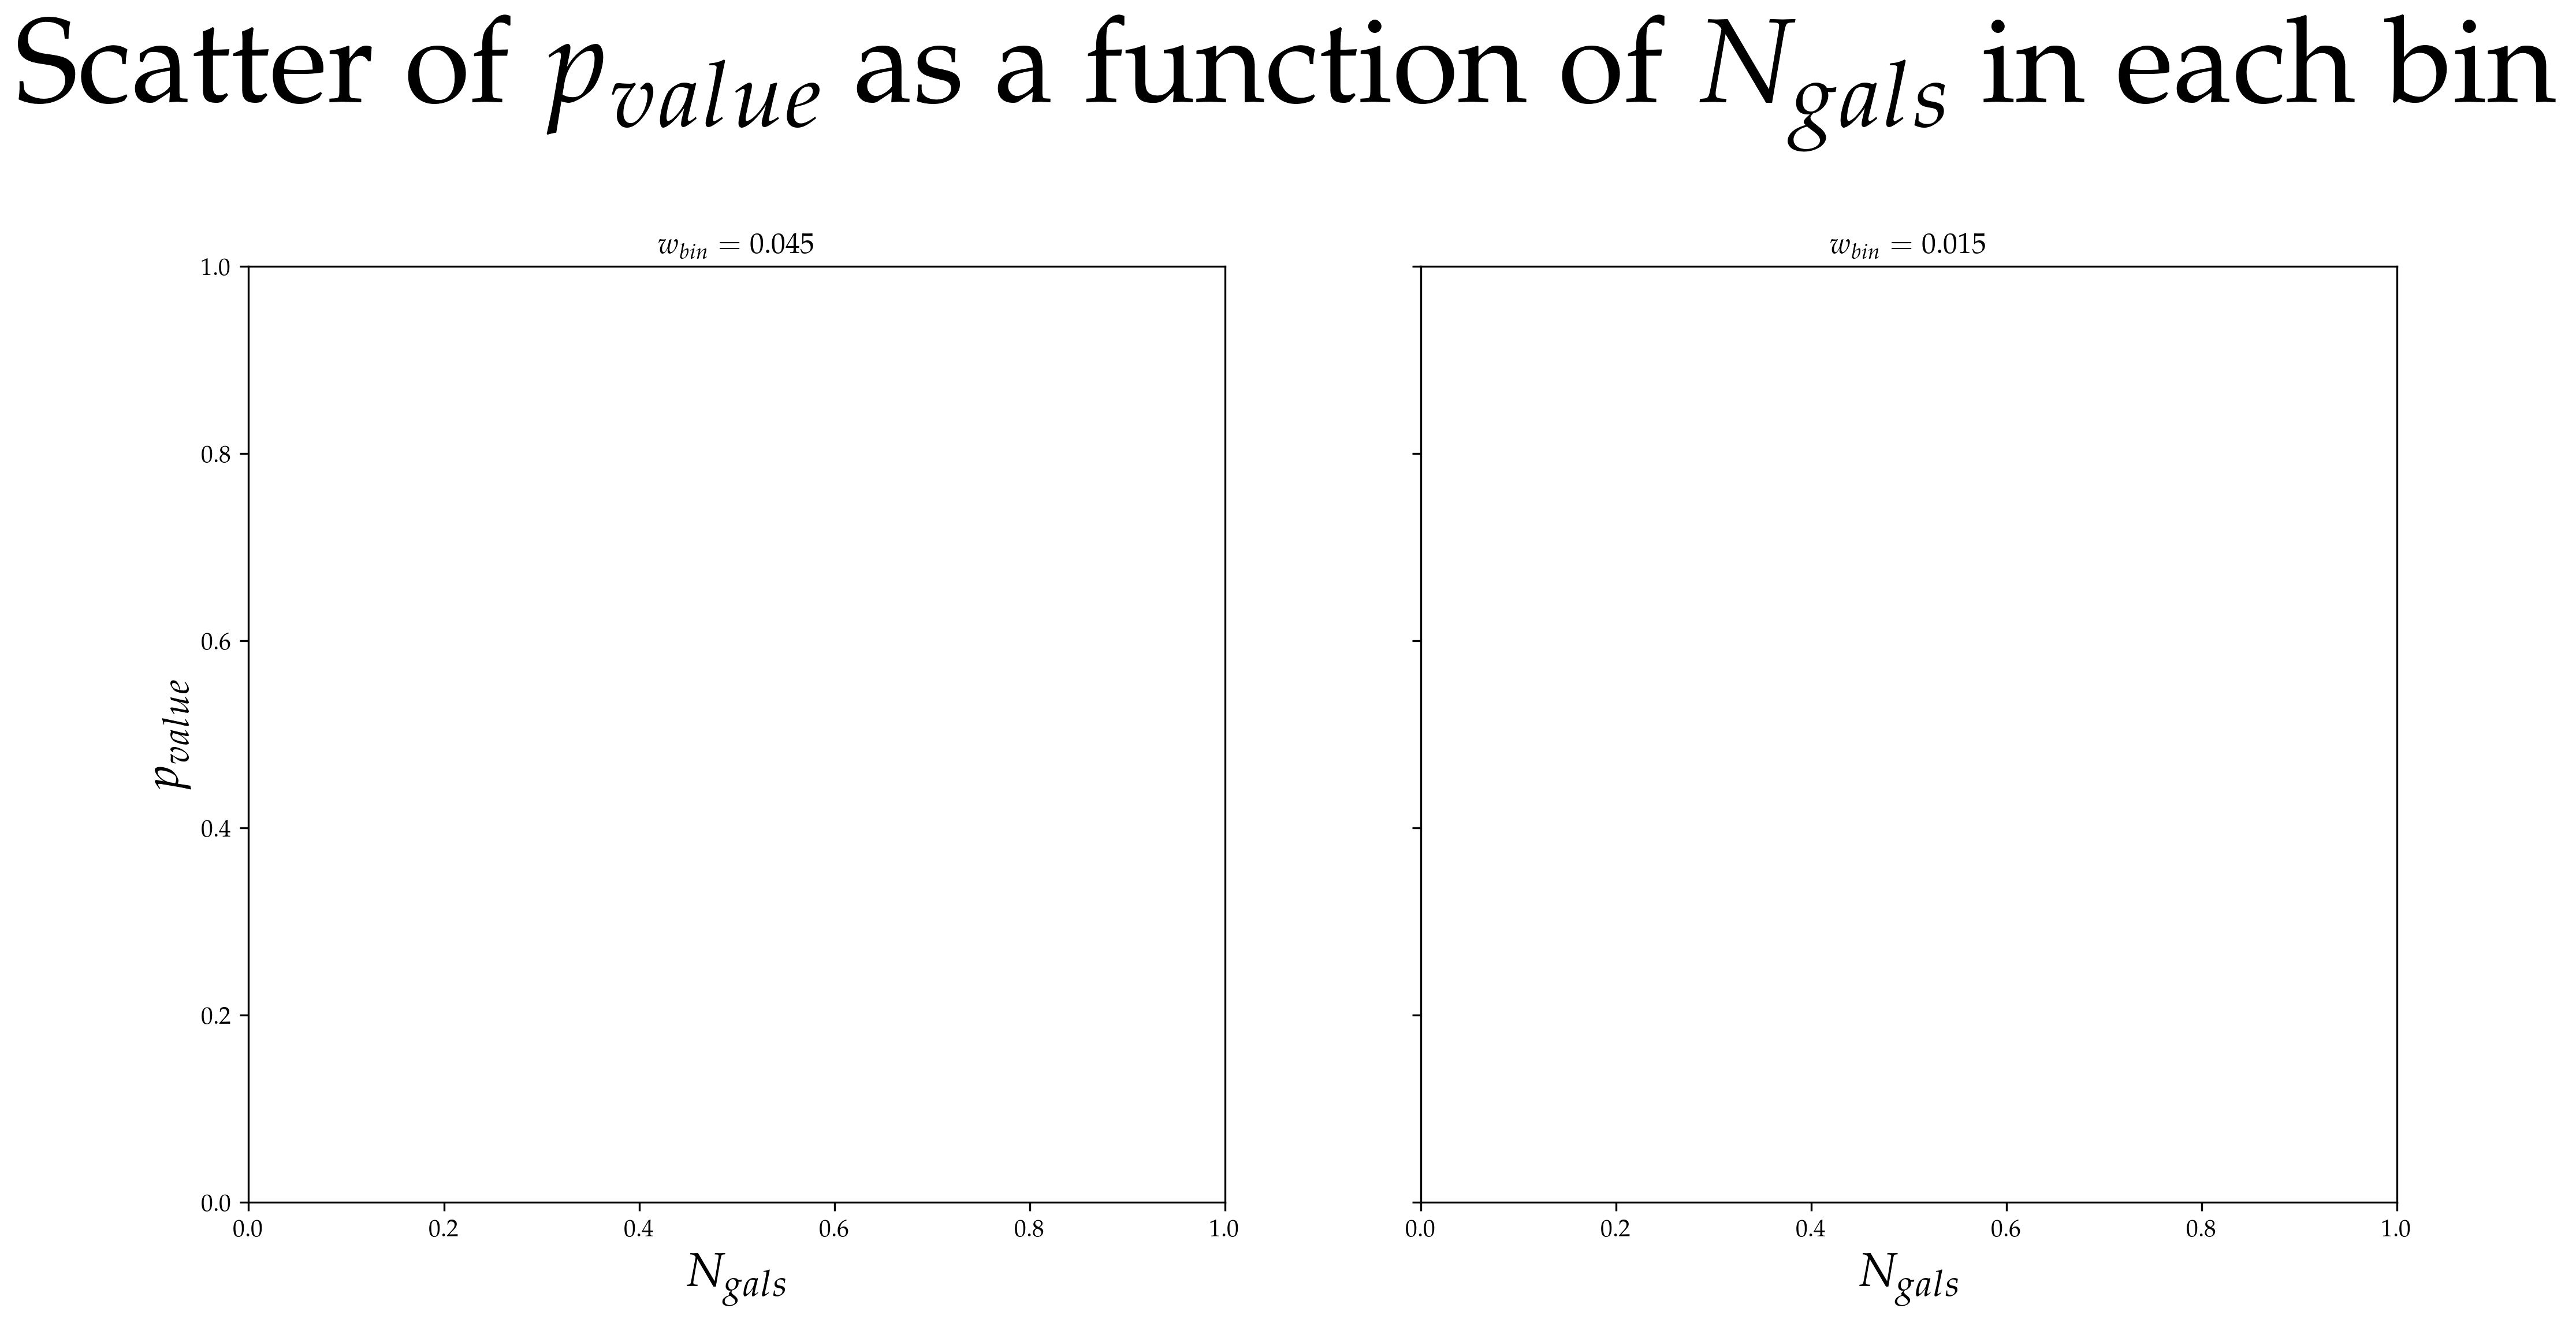

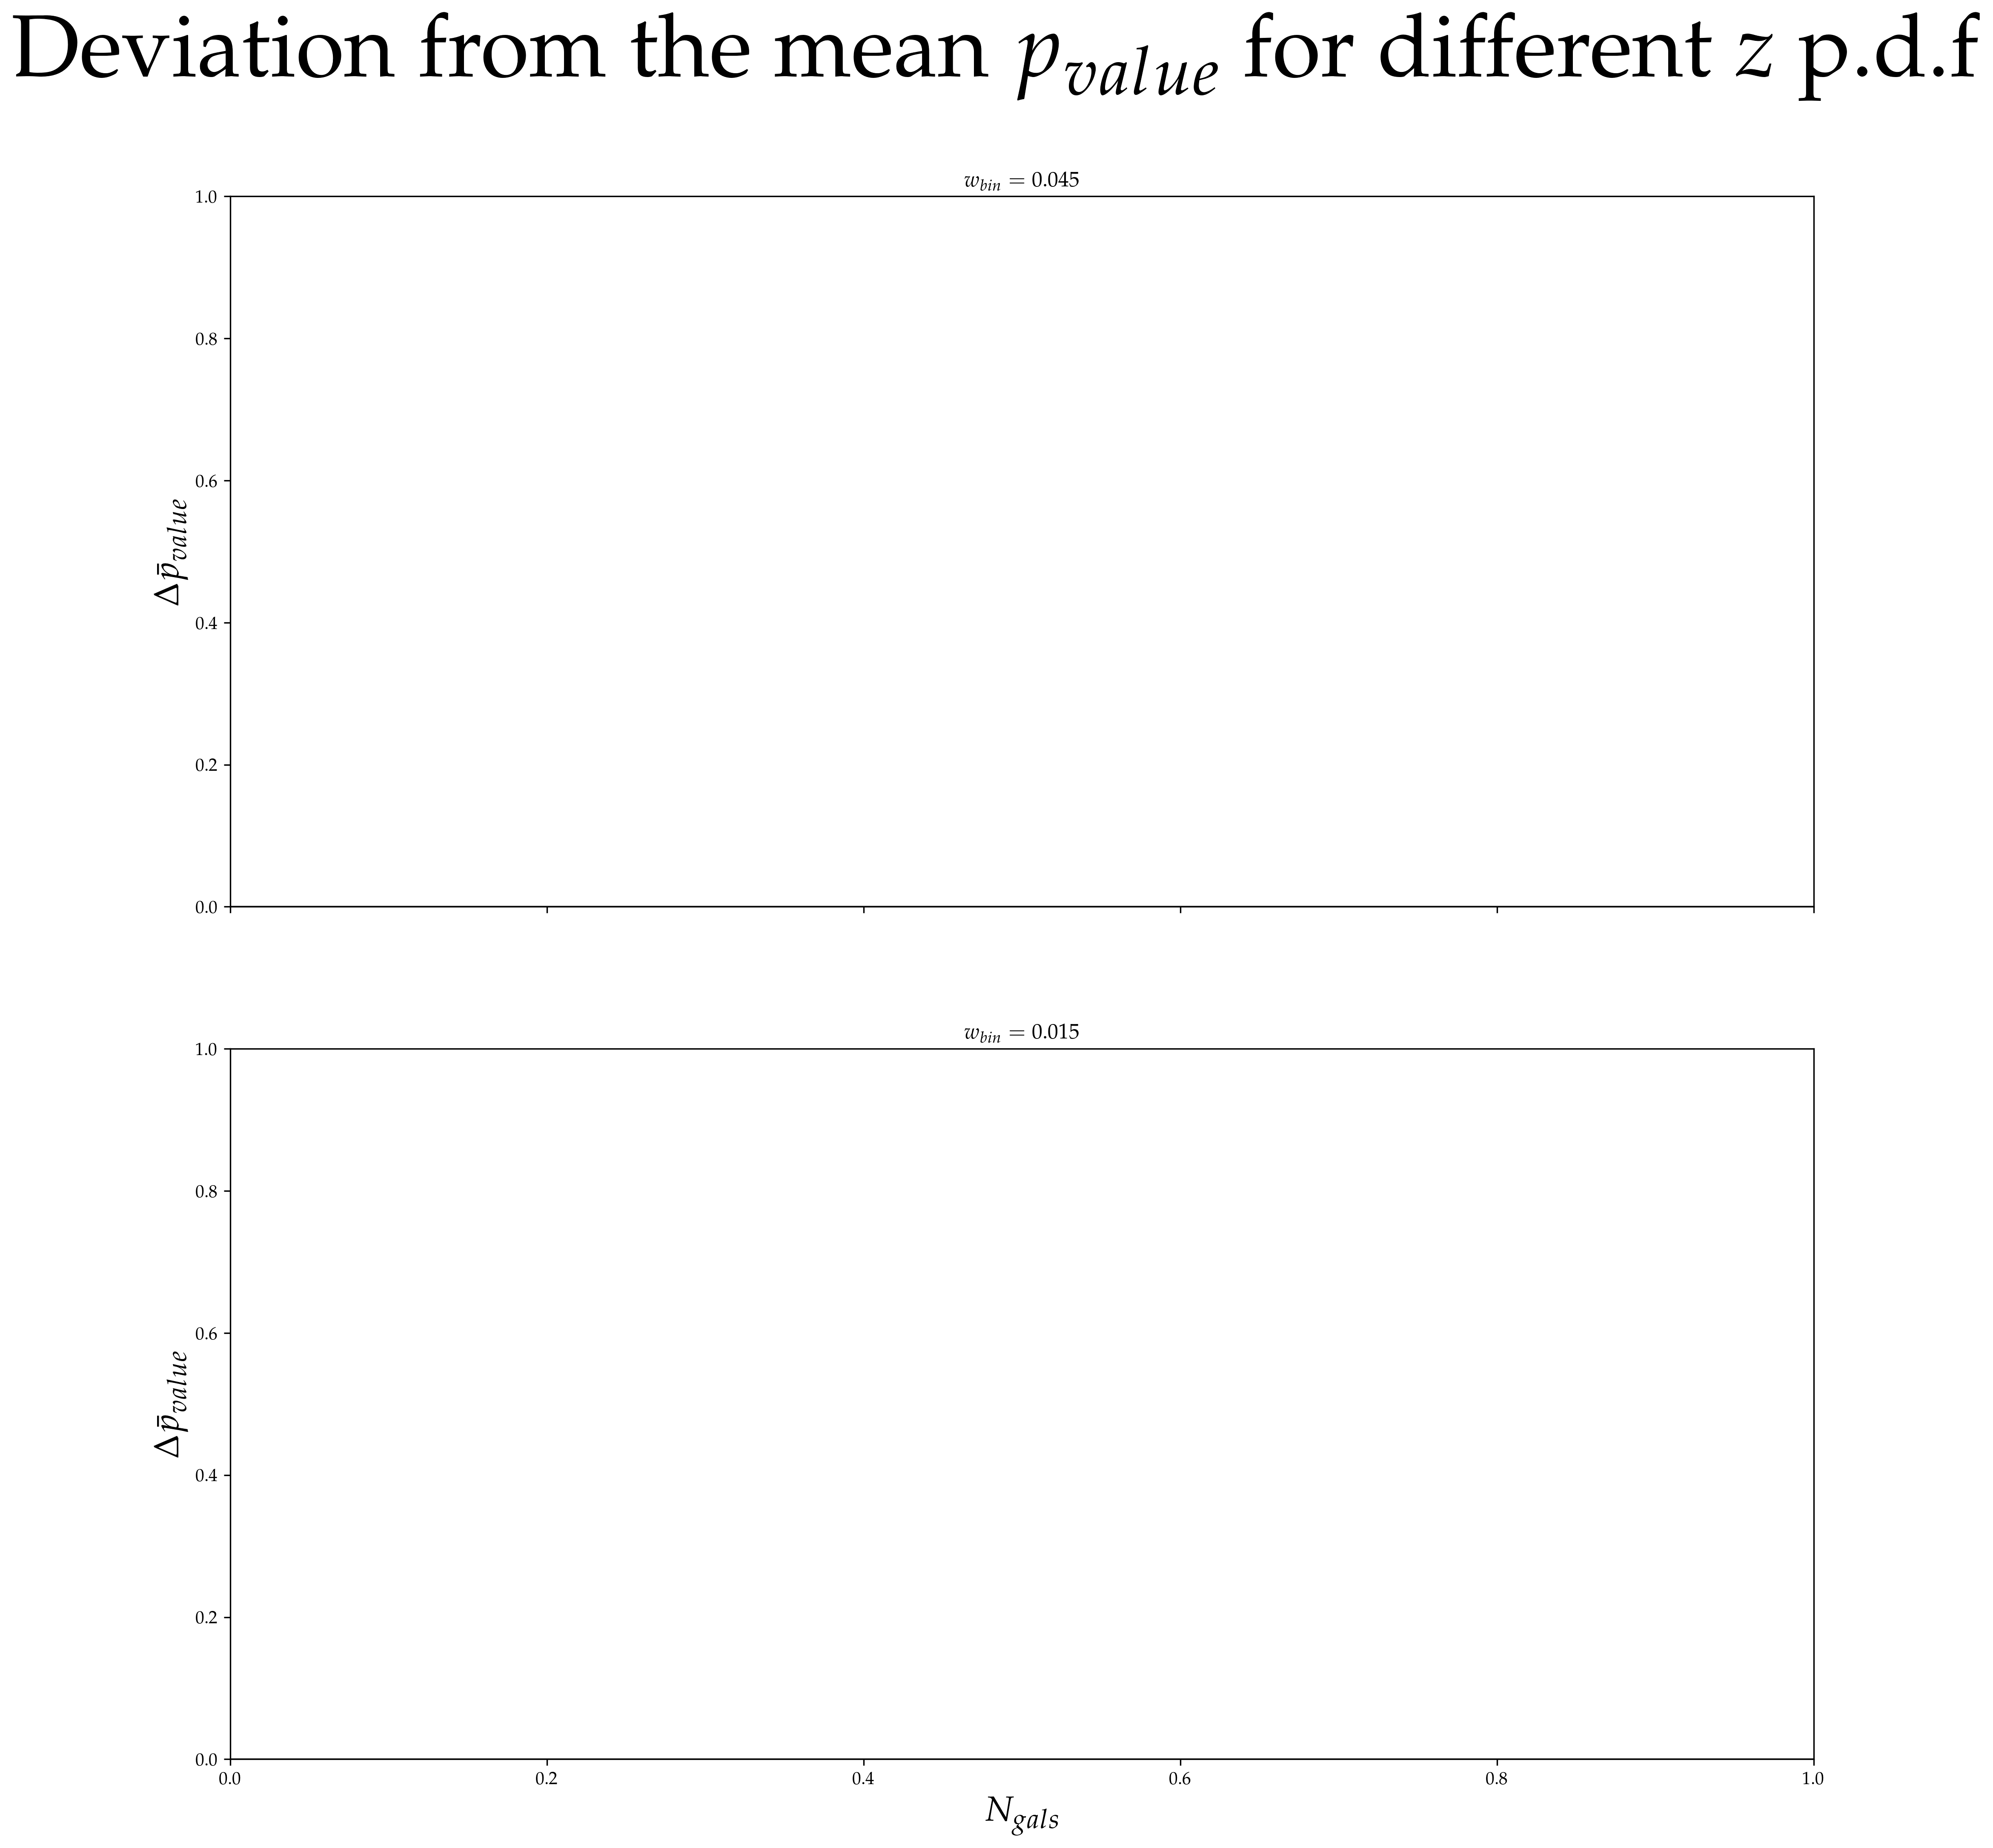

In [140]:
fig2, ax2 = plt.subplots(1, 2, figsize=(16,8), dpi=300, facecolor="white", sharex=True, sharey=True)
fig3, ax3 = plt.subplots(2, 1, figsize=(16,16), dpi=300, facecolor="white", sharex=True, sharey=True)

fig2.suptitle(f"Scatter of $p_{{value}}$ as a function of $N_{{gals}}$ in each bin", fontsize='50', weight='bold')
fig3.suptitle(f"Deviation from the mean $p_{{value}}$ for different $z$ p.d.f", fontsize='50', weight='bold')

# fig2.tight_layout()
fig2.subplots_adjust(top=0.8)
# fig3.tight_layout()
fig3.subplots_adjust(top=0.89)

ax2[0].set_title(f"$w_{{bin}} = 0.045$")
ax2[1].set_title(f"$w_{{bin}} = 0.015$")
ax2[0].set_ylabel(f"$p_{{value}}$", fontsize=20)
ax2[0].set_xlabel(f"$N_{{gals}}$", fontsize=20)
ax2[1].set_xlabel(f"$N_{{gals}}$", fontsize=20)

ax3[0].set_title(f"$w_{{bin}} = 0.045$")
ax3[1].set_title(f"$w_{{bin}} = 0.015$")
ax3[0].set_ylabel(f"$\Delta \\bar{{p}}_{{value}}$", fontsize=20)
ax3[1].set_ylabel(f"$\Delta \\bar{{p}}_{{value}}$", fontsize=20)
ax3[1].set_xlabel(f"$N_{{gals}}$", fontsize=20)

ax3[0].axhline(y=0, linewidth=1, alpha=0.8, color='tab:gray')
ax3[1].axhline(y=0, linewidth=1, alpha=0.8, color='tab:gray')

In [141]:
shapiro_chang       = np.load(f"Data/Shapiro/shapiro_data_(chang13,73,10).npy")
shapiro_chang_photo = np.load(f"Data/Shapiro/shapiro_data_(('chang13', 0.05),73,10).npy")
shapiro_fixed       = np.load(f"Data/Shapiro/shapiro_data_(0.7,73,10).npy")
shapiro_fixed_photo = np.load(f"Data/Shapiro/shapiro_data_((0.7, 0.05),73,10).npy")

In [142]:
bin_width = 1
nbins = int(max([max(shapiro_chang[:,1]), max(shapiro_chang_photo[:,1]), max(shapiro_fixed[:,1]), max(shapiro_fixed_photo[:,1])])//bin_width)
N_bin_edges = da.make_bins(0, max([max(shapiro_chang[:,1]), max(shapiro_chang_photo[:,1]), max(shapiro_fixed[:,1]), max(shapiro_fixed_photo[:,1])]), nbins)

# fig, ax = plt.subplots(1, 1, figsize=(16,16), dpi=100, facecolor="white")

pv_mean_chang = binned_statistic(shapiro_chang[:,1], shapiro_chang[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_chang  = binned_statistic(shapiro_chang[:,1], shapiro_chang[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_chang  = binned_statistic(shapiro_chang[:,1], shapiro_chang[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_chang_photo = binned_statistic(shapiro_chang_photo[:,1], shapiro_chang_photo[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_chang_photo  = binned_statistic(shapiro_chang_photo[:,1], shapiro_chang_photo[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_chang_photo  = binned_statistic(shapiro_chang_photo[:,1], shapiro_chang_photo[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_fixed = binned_statistic(shapiro_fixed[:,1], shapiro_fixed[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_fixed  = binned_statistic(shapiro_fixed[:,1], shapiro_fixed[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_fixed  = binned_statistic(shapiro_fixed[:,1], shapiro_fixed[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_fixed_photo = binned_statistic(shapiro_fixed_photo[:,1], shapiro_fixed_photo[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_fixed_photo  = binned_statistic(shapiro_fixed_photo[:,1], shapiro_fixed_photo[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_fixed_photo  = binned_statistic(shapiro_fixed_photo[:,1], shapiro_fixed_photo[:,1], bins=N_bin_edges, statistic='mean')[0]



ax2[0].scatter(N_mean_chang, pv_mean_chang, alpha=0.6)
ax2[0].scatter(N_mean_chang_photo, pv_mean_chang_photo, alpha=0.6)
ax2[0].scatter(N_mean_fixed, pv_mean_fixed, alpha=0.6)
ax2[0].scatter(N_mean_fixed_photo, pv_mean_fixed_photo, alpha=0.6)
ax2[0].axhline(y=0.01, linewidth=1, alpha=0.8, color='tab:gray')

ax2[0].set_yscale('log')



In [143]:
bin_width = 1
nbins = int(max([max(shapiro_chang[:,1]), max(shapiro_chang_photo[:,1]), max(shapiro_fixed[:,1]), max(shapiro_fixed_photo[:,1])])//bin_width)
N_bin_edges = da.make_bins(0, max([max(shapiro_chang[:,1]), max(shapiro_chang_photo[:,1]), max(shapiro_fixed[:,1]), max(shapiro_fixed_photo[:,1])]), nbins)

# fig, ax = plt.subplots(1, 1, figsize=(16,8), dpi=300, facecolor="white")

pv_mean_chang = binned_statistic(shapiro_chang[:,1], shapiro_chang[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_chang  = binned_statistic(shapiro_chang[:,1], shapiro_chang[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_chang  = binned_statistic(shapiro_chang[:,1], shapiro_chang[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_chang_photo = binned_statistic(shapiro_chang_photo[:,1], shapiro_chang_photo[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_chang_photo  = binned_statistic(shapiro_chang_photo[:,1], shapiro_chang_photo[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_chang_photo  = binned_statistic(shapiro_chang_photo[:,1], shapiro_chang_photo[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_fixed = binned_statistic(shapiro_fixed[:,1], shapiro_fixed[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_fixed  = binned_statistic(shapiro_fixed[:,1], shapiro_fixed[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_fixed  = binned_statistic(shapiro_fixed[:,1], shapiro_fixed[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_fixed_photo = binned_statistic(shapiro_fixed_photo[:,1], shapiro_fixed_photo[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_fixed_photo  = binned_statistic(shapiro_fixed_photo[:,1], shapiro_fixed_photo[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_fixed_photo  = binned_statistic(shapiro_fixed_photo[:,1], shapiro_fixed_photo[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean  = [np.nanmean([pv_mean_chang[i], pv_mean_chang_photo[i], pv_mean_fixed[i], pv_mean_fixed_photo[i]]) for i in range(nbins)]
std_mean = np.sqrt(np.nansum([np.power(pv_std_chang,2), np.power(pv_std_chang_photo,2), np.power(pv_std_fixed,2), np.power(pv_std_fixed_photo,2)], axis=0))
    
ax3[0].scatter(N_mean_chang, np.subtract(pv_mean_chang, pv_mean), marker='o', alpha=0.8, label=f'Chang13')
ax3[0].scatter(N_mean_chang_photo, np.subtract(pv_mean_chang_photo, pv_mean), marker='o', alpha=0.8, label=f'Chang13 + photo-$z$')
ax3[0].scatter(N_mean_fixed, np.subtract(pv_mean_fixed, pv_mean), marker='o', alpha=0.8, label=f'$z=0.7$')
ax3[0].scatter(N_mean_fixed_photo, np.subtract(pv_mean_fixed_photo, pv_mean), marker='o', alpha=0.8, label=f'$z=0.7$  + photo-$z$')
ax3[0].legend()

# ax.errorbar(N_mean_chang, np.abs(np.subtract(pv_mean_chang, pv_mean)), fmt='o', alpha=0.8)
# ax.errorbar(N_mean_chang_photo, np.abs(np.subtract(pv_mean_chang_photo, pv_mean)), fmt='o', alpha=0.8)
# ax.errorbar(N_mean_fixed, np.abs(np.subtract(pv_mean_fixed, pv_mean)), fmt='o', alpha=0.8)
# ax.errorbar(N_mean_fixed_photo, np.abs(np.subtract(pv_mean_fixed_photo, pv_mean)), fmt='o', alpha=0.8)

# ax.set_yscale('log')

/tmp/ipykernel_52597/915606690.py:23: RuntimeWarning: Mean of empty slice
  pv_mean  = [np.nanmean([pv_mean_chang[i], pv_mean_chang_photo[i], pv_mean_fixed[i], pv_mean_fixed_photo[i]]) for i in range(nbins)]


In [144]:
shapiro_chang       = np.load(f"Data/Shapiro/shapiro_data_(chang13,220,10).npy")
shapiro_chang_photo = np.load(f"Data/Shapiro/shapiro_data_(('chang13', 0.05),220,10).npy")
shapiro_fixed       = np.load(f"Data/Shapiro/shapiro_data_(0.7,220,10).npy")
shapiro_fixed_photo = np.load(f"Data/Shapiro/shapiro_data_((0.7, 0.05),220,10).npy")

In [145]:
bin_width = 1
nbins = int(max([max(shapiro_chang[:,1]), max(shapiro_chang_photo[:,1]), max(shapiro_fixed[:,1]), max(shapiro_fixed_photo[:,1])])//bin_width)
N_bin_edges = da.make_bins(0, max([max(shapiro_chang[:,1]), max(shapiro_chang_photo[:,1]), max(shapiro_fixed[:,1]), max(shapiro_fixed_photo[:,1])]), nbins)

# fig, ax = plt.subplots(1, 1, figsize=(16,16), dpi=100, facecolor="white")

pv_mean_chang = binned_statistic(shapiro_chang[:,1], shapiro_chang[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_chang  = binned_statistic(shapiro_chang[:,1], shapiro_chang[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_chang  = binned_statistic(shapiro_chang[:,1], shapiro_chang[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_chang_photo = binned_statistic(shapiro_chang_photo[:,1], shapiro_chang_photo[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_chang_photo  = binned_statistic(shapiro_chang_photo[:,1], shapiro_chang_photo[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_chang_photo  = binned_statistic(shapiro_chang_photo[:,1], shapiro_chang_photo[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_fixed = binned_statistic(shapiro_fixed[:,1], shapiro_fixed[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_fixed  = binned_statistic(shapiro_fixed[:,1], shapiro_fixed[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_fixed  = binned_statistic(shapiro_fixed[:,1], shapiro_fixed[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_fixed_photo = binned_statistic(shapiro_fixed_photo[:,1], shapiro_fixed_photo[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_fixed_photo  = binned_statistic(shapiro_fixed_photo[:,1], shapiro_fixed_photo[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_fixed_photo  = binned_statistic(shapiro_fixed_photo[:,1], shapiro_fixed_photo[:,1], bins=N_bin_edges, statistic='mean')[0]



ax2[1].scatter(N_mean_chang, pv_mean_chang, alpha=0.6)
ax2[1].scatter(N_mean_chang_photo, pv_mean_chang_photo, alpha=0.6)
ax2[1].scatter(N_mean_fixed, pv_mean_fixed, alpha=0.6)
ax2[1].scatter(N_mean_fixed_photo, pv_mean_fixed_photo, alpha=0.6)
ax2[1].axhline(y=0.01, linewidth=1, alpha=0.8, color='tab:gray')

ax2[1].set_yscale('log')



In [146]:
bin_width = 1
nbins = int(max([max(shapiro_chang[:,1]), max(shapiro_chang_photo[:,1]), max(shapiro_fixed[:,1]), max(shapiro_fixed_photo[:,1])])//bin_width)
N_bin_edges = da.make_bins(0, max([max(shapiro_chang[:,1]), max(shapiro_chang_photo[:,1]), max(shapiro_fixed[:,1]), max(shapiro_fixed_photo[:,1])]), nbins)

# fig, ax = plt.subplots(1, 1, figsize=(16,8), dpi=300, facecolor="white")

pv_mean_chang = binned_statistic(shapiro_chang[:,1], shapiro_chang[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_chang  = binned_statistic(shapiro_chang[:,1], shapiro_chang[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_chang  = binned_statistic(shapiro_chang[:,1], shapiro_chang[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_chang_photo = binned_statistic(shapiro_chang_photo[:,1], shapiro_chang_photo[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_chang_photo  = binned_statistic(shapiro_chang_photo[:,1], shapiro_chang_photo[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_chang_photo  = binned_statistic(shapiro_chang_photo[:,1], shapiro_chang_photo[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_fixed = binned_statistic(shapiro_fixed[:,1], shapiro_fixed[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_fixed  = binned_statistic(shapiro_fixed[:,1], shapiro_fixed[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_fixed  = binned_statistic(shapiro_fixed[:,1], shapiro_fixed[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean_fixed_photo = binned_statistic(shapiro_fixed_photo[:,1], shapiro_fixed_photo[:,0], bins=N_bin_edges, statistic='mean')[0]
pv_std_fixed_photo  = binned_statistic(shapiro_fixed_photo[:,1], shapiro_fixed_photo[:,0], bins=N_bin_edges, statistic='std')[0]
N_mean_fixed_photo  = binned_statistic(shapiro_fixed_photo[:,1], shapiro_fixed_photo[:,1], bins=N_bin_edges, statistic='mean')[0]

pv_mean  = [np.nanmean([pv_mean_chang[i], pv_mean_chang_photo[i], pv_mean_fixed[i], pv_mean_fixed_photo[i]]) for i in range(nbins)]
std_mean = np.sqrt(np.nansum([np.power(pv_std_chang,2), np.power(pv_std_chang_photo,2), np.power(pv_std_fixed,2), np.power(pv_std_fixed_photo,2)], axis=0))
    
ax3[1].scatter(N_mean_chang, np.subtract(pv_mean_chang, pv_mean), marker='o', alpha=0.8, label=f'Chang13')
ax3[1].scatter(N_mean_chang_photo, np.subtract(pv_mean_chang_photo, pv_mean), marker='o', alpha=0.8, label=f'Chang13 + photo-$z$')
ax3[1].scatter(N_mean_fixed, np.subtract(pv_mean_fixed, pv_mean), marker='o', alpha=0.8, label=f'$z=0.7$')
ax3[1].scatter(N_mean_fixed_photo, np.subtract(pv_mean_fixed_photo, pv_mean), marker='o', alpha=0.8, label=f'$z=0.7$  + photo-$z$')
ax3[1].legend()

# ax.errorbar(N_mean_chang, np.abs(np.subtract(pv_mean_chang, pv_mean)), fmt='o', alpha=0.8)
# ax.errorbar(N_mean_chang_photo, np.abs(np.subtract(pv_mean_chang_photo, pv_mean)), fmt='o', alpha=0.8)
# ax.errorbar(N_mean_fixed, np.abs(np.subtract(pv_mean_fixed, pv_mean)), fmt='o', alpha=0.8)
# ax.errorbar(N_mean_fixed_photo, np.abs(np.subtract(pv_mean_fixed_photo, pv_mean)), fmt='o', alpha=0.8)

# ax.set_yscale('log')

/tmp/ipykernel_52597/2919186465.py:23: RuntimeWarning: Mean of empty slice
  pv_mean  = [np.nanmean([pv_mean_chang[i], pv_mean_chang_photo[i], pv_mean_fixed[i], pv_mean_fixed_photo[i]]) for i in range(nbins)]


In [147]:
fig2.savefig("Plots/Shapiro/p_x_N_shapiro_z.png")
fig3.savefig("Plots/Shapiro/dev_mean_shapiro_z.png")